In [4]:
import pandas as pd
import numpy as np
import pubchempy as pc
import time

In [9]:
#load df_merge
df = pd.read_csv('dataset/df_final.csv')

# Generate Smile

In [3]:
list_cid_unik = df['PubChem CID'].unique()
list_protein_unik = df['Protein Target'].unique()
print(list_cid_unik.shape)
print(list_protein_unik.shape)

(5650,)
(7,)


In [ ]:

# compound_smiles = []
# compound_fingerprint=[]
# j=0
# for i in list_cid_unik:
#     print("senyawa ke", j) 
#     print("cid",i)
#     t0 = time.time()
#     #Smiles
#     compound_smiles.append((i,pc.Compound.from_cid(str(i)).canonical_smiles))
    
#     t1 = time.time()
#     print("waktu proses", t1-t0)
#     j=j+1
# com_smiles = pd.DataFrame(compound_smiles, columns = ["CID_senyawa", "smiles"])



In [27]:
# com_smiles.to_csv('df_smiles.csv', index=False)

In [32]:
com_smiles = pd.read_csv('dataset/final/df_smiles.csv')

In [33]:
com_smiles

,CID_senyawa,smiles
0,261,CCCC=O
1,263,CCCCO
2,305,C[N+](C)(C)CCO
3,525,C(C(C(=O)O)O)C(=O)O
4,586,CN(CC(=O)O)C(=N)N
...,...,...
5645,62709758,C1CC1CNC2=C(C=C(C=C2)C(F)(F)F)C(=O)O
5646,71744953,C1=CC=C(C=C1)CCCCCCNC(=O)SCC2=CC=CC=C2F
5647,54704622,CN1CC(=C(C1=O)O)C(=O)NCCCC2=CC(=C(C=C2)Cl)Cl
5648,90342616,CN1C=CC(=C(C1=O)O)C(=O)NCCCC2=CC(=C(C=C2)Cl)Cl


# Compound Extraction

In [34]:
#fingerprint library
from PyFingerprint.fingerprint import get_fingerprint

In [35]:
#fingerprint and it's size
list_fp = ['pubchem' ,'klekota-roth','maccs']
size_fp = [881, 4860, 166]

In [37]:
# feature engineering

for i in range(len(list_fp)):
    print('Processing for FP:', list_fp[i])
    com_fingerprint_fp = pd.DataFrame(np.zeros((len(com_smiles), size_fp[i])))
    
    #create column names
    #berguna untuk penggabungan pandas
    column_names = []
    for num in range(size_fp[i]):
        column_names.append(num)
      
    j=0
    tracknumber = 0
    for k in com_smiles['smiles']:
        print("CID senyawa", com_smiles.iloc[j,0])
        print("jumlah senyawa", tracknumber)
        fps = get_fingerprint(k, fp_type=list_fp[i])
        fps = fps.to_numpy()
        fps = fps.tolist()
        com_fingerprint_fp.loc[j,column_names] = fps
        j=j+1
        tracknumber=tracknumber+1
    print(com_fingerprint_fp)
    
    com_fingerprint_fp.to_csv('dataset/final/com_fp_'+list_fp[i] +'NewFiltered.csv', index=False)

Processing for FP: pubchem
CID senyawa 261
jumlah senyawa 0
CID senyawa 263
jumlah senyawa 1
CID senyawa 305
jumlah senyawa 2
CID senyawa 525
jumlah senyawa 3
CID senyawa 586
jumlah senyawa 4
CID senyawa 727
jumlah senyawa 5
CID senyawa 864
jumlah senyawa 6
CID senyawa 867
jumlah senyawa 7
CID senyawa 896
jumlah senyawa 8
CID senyawa 935
jumlah senyawa 9
CID senyawa 936
jumlah senyawa 10
CID senyawa 938
jumlah senyawa 11
CID senyawa 970
jumlah senyawa 12
CID senyawa 977
jumlah senyawa 13
CID senyawa 985
jumlah senyawa 14
CID senyawa 1024
jumlah senyawa 15
CID senyawa 1032
jumlah senyawa 16
CID senyawa 1054
jumlah senyawa 17
CID senyawa 1060
jumlah senyawa 18
CID senyawa 1456
jumlah senyawa 19
CID senyawa 1983
jumlah senyawa 20
CID senyawa 2148
jumlah senyawa 21
CID senyawa 2157
jumlah senyawa 22
CID senyawa 2236
jumlah senyawa 23
CID senyawa 2256
jumlah senyawa 24
CID senyawa 2336
jumlah senyawa 25
CID senyawa 2347
jumlah senyawa 26
CID senyawa 2554
jumlah senyawa 27
CID senyawa 2730
j

CID senyawa 5505
jumlah senyawa 230
CID senyawa 5565
jumlah senyawa 231
CID senyawa 5753
jumlah senyawa 232
CID senyawa 5816
jumlah senyawa 233
CID senyawa 5833
jumlah senyawa 234
CID senyawa 5849
jumlah senyawa 235
CID senyawa 5865
jumlah senyawa 236
CID senyawa 5957
jumlah senyawa 237
CID senyawa 5988
jumlah senyawa 238
CID senyawa 5995
jumlah senyawa 239
CID senyawa 6013
jumlah senyawa 240
CID senyawa 6163
jumlah senyawa 241
CID senyawa 6197
jumlah senyawa 242
CID senyawa 6230
jumlah senyawa 243
CID senyawa 6238
jumlah senyawa 244
CID senyawa 6636
jumlah senyawa 245
CID senyawa 7090
jumlah senyawa 246
CID senyawa 7184
jumlah senyawa 247
CID senyawa 8289
jumlah senyawa 248
CID senyawa 8343
jumlah senyawa 249
CID senyawa 8468
jumlah senyawa 250
CID senyawa 9400
jumlah senyawa 251
CID senyawa 9880
jumlah senyawa 252
CID senyawa 9903
jumlah senyawa 253
CID senyawa 10494
jumlah senyawa 254
CID senyawa 12111
jumlah senyawa 255
CID senyawa 12837
jumlah senyawa 256
CID senyawa 12898
jumlah 

CID senyawa 2286
jumlah senyawa 457
CID senyawa 2353
jumlah senyawa 458
CID senyawa 2374
jumlah senyawa 459
CID senyawa 2375
jumlah senyawa 460
CID senyawa 2513
jumlah senyawa 461
CID senyawa 2662
jumlah senyawa 462
CID senyawa 2750
jumlah senyawa 463
CID senyawa 2754
jumlah senyawa 464
CID senyawa 2787
jumlah senyawa 465
CID senyawa 2797
jumlah senyawa 466
CID senyawa 2871
jumlah senyawa 467
CID senyawa 3026
jumlah senyawa 468
CID senyawa 3117
jumlah senyawa 469
CID senyawa 3220
jumlah senyawa 470
CID senyawa 3314
jumlah senyawa 471
CID senyawa 3342
jumlah senyawa 472
CID senyawa 3346
jumlah senyawa 473
CID senyawa 3371
jumlah senyawa 474
CID senyawa 3385
jumlah senyawa 475
CID senyawa 3397
jumlah senyawa 476
CID senyawa 3406
jumlah senyawa 477
CID senyawa 3444
jumlah senyawa 478
CID senyawa 3463
jumlah senyawa 479
CID senyawa 3672
jumlah senyawa 480
CID senyawa 3690
jumlah senyawa 481
CID senyawa 3730
jumlah senyawa 482
CID senyawa 3806
jumlah senyawa 483
CID senyawa 4008
jumlah seny

CID senyawa 208901
jumlah senyawa 686
CID senyawa 304599
jumlah senyawa 687
CID senyawa 433294
jumlah senyawa 688
CID senyawa 444036
jumlah senyawa 689
CID senyawa 480775
jumlah senyawa 690
CID senyawa 490002
jumlah senyawa 691
CID senyawa 590836
jumlah senyawa 692
CID senyawa 637566
jumlah senyawa 693
CID senyawa 644019
jumlah senyawa 694
CID senyawa 644109
jumlah senyawa 695
CID senyawa 657048
jumlah senyawa 696
CID senyawa 969516
jumlah senyawa 697
CID senyawa 1231560
jumlah senyawa 698
CID senyawa 1548943
jumlah senyawa 699
CID senyawa 1794427
jumlah senyawa 700
CID senyawa 2733489
jumlah senyawa 701
CID senyawa 2773624
jumlah senyawa 702
CID senyawa 3016570
jumlah senyawa 703
CID senyawa 3091786
jumlah senyawa 704
CID senyawa 3391107
jumlah senyawa 705
CID senyawa 3651377
jumlah senyawa 706
CID senyawa 4166922
jumlah senyawa 707
CID senyawa 5280443
jumlah senyawa 708
CID senyawa 5280445
jumlah senyawa 709
CID senyawa 5280884
jumlah senyawa 710
CID senyawa 5280933
jumlah senyawa 71

CID senyawa 53470377
jumlah senyawa 900
CID senyawa 53470388
jumlah senyawa 901
CID senyawa 53470378
jumlah senyawa 902
CID senyawa 22261152
jumlah senyawa 903
CID senyawa 11058026
jumlah senyawa 904
CID senyawa 53805115
jumlah senyawa 905
CID senyawa 6253276
jumlah senyawa 906
CID senyawa 66575622
jumlah senyawa 907
CID senyawa 91928508
jumlah senyawa 908
CID senyawa 91928509
jumlah senyawa 909
CID senyawa 46233311
jumlah senyawa 910
CID senyawa 2800647
jumlah senyawa 911
CID senyawa 45104340
jumlah senyawa 912
CID senyawa 45104341
jumlah senyawa 913
CID senyawa 45104342
jumlah senyawa 914
CID senyawa 45104343
jumlah senyawa 915
CID senyawa 45104439
jumlah senyawa 916
CID senyawa 45104440
jumlah senyawa 917
CID senyawa 45104441
jumlah senyawa 918
CID senyawa 45104442
jumlah senyawa 919
CID senyawa 45104443
jumlah senyawa 920
CID senyawa 45104444
jumlah senyawa 921
CID senyawa 45104445
jumlah senyawa 922
CID senyawa 45104339
jumlah senyawa 923
CID senyawa 91928423
jumlah senyawa 924
CI

CID senyawa 44434351
jumlah senyawa 1112
CID senyawa 10223023
jumlah senyawa 1113
CID senyawa 10204762
jumlah senyawa 1114
CID senyawa 70696489
jumlah senyawa 1115
CID senyawa 10226233
jumlah senyawa 1116
CID senyawa 44392315
jumlah senyawa 1117
CID senyawa 9888484
jumlah senyawa 1118
CID senyawa 44388210
jumlah senyawa 1119
CID senyawa 10297760
jumlah senyawa 1120
CID senyawa 22280103
jumlah senyawa 1121
CID senyawa 91932628
jumlah senyawa 1122
CID senyawa 70696490
jumlah senyawa 1123
CID senyawa 9826186
jumlah senyawa 1124
CID senyawa 16085986
jumlah senyawa 1125
CID senyawa 10174350
jumlah senyawa 1126
CID senyawa 22280062
jumlah senyawa 1127
CID senyawa 10004270
jumlah senyawa 1128
CID senyawa 70681801
jumlah senyawa 1129
CID senyawa 9890585
jumlah senyawa 1130
CID senyawa 11178750
jumlah senyawa 1131
CID senyawa 70686048
jumlah senyawa 1132
CID senyawa 10139247
jumlah senyawa 1133
CID senyawa 11271060
jumlah senyawa 1134
CID senyawa 11431192
jumlah senyawa 1135
CID senyawa 7068391

CID senyawa 71099328
jumlah senyawa 1315
CID senyawa 71099330
jumlah senyawa 1316
CID senyawa 71099329
jumlah senyawa 1317
CID senyawa 71099331
jumlah senyawa 1318
CID senyawa 71099333
jumlah senyawa 1319
CID senyawa 71099332
jumlah senyawa 1320
CID senyawa 71074341
jumlah senyawa 1321
CID senyawa 91819670
jumlah senyawa 1322
CID senyawa 71075185
jumlah senyawa 1323
CID senyawa 71074964
jumlah senyawa 1324
CID senyawa 71074601
jumlah senyawa 1325
CID senyawa 71075357
jumlah senyawa 1326
CID senyawa 71074686
jumlah senyawa 1327
CID senyawa 71074915
jumlah senyawa 1328
CID senyawa 71074437
jumlah senyawa 1329
CID senyawa 71074698
jumlah senyawa 1330
CID senyawa 71074807
jumlah senyawa 1331
CID senyawa 71074744
jumlah senyawa 1332
CID senyawa 71074844
jumlah senyawa 1333
CID senyawa 71075096
jumlah senyawa 1334
CID senyawa 71075689
jumlah senyawa 1335
CID senyawa 71074392
jumlah senyawa 1336
CID senyawa 71074596
jumlah senyawa 1337
CID senyawa 71075190
jumlah senyawa 1338
CID senyawa 7107

CID senyawa 145953039
jumlah senyawa 1531
CID senyawa 145956965
jumlah senyawa 1532
CID senyawa 68662059
jumlah senyawa 1533
CID senyawa 25115277
jumlah senyawa 1534
CID senyawa 145972429
jumlah senyawa 1535
CID senyawa 145954353
jumlah senyawa 1536
CID senyawa 68661534
jumlah senyawa 1537
CID senyawa 68662065
jumlah senyawa 1538
CID senyawa 68661565
jumlah senyawa 1539
CID senyawa 68661767
jumlah senyawa 1540
CID senyawa 145951479
jumlah senyawa 1541
CID senyawa 68661621
jumlah senyawa 1542
CID senyawa 68661800
jumlah senyawa 1543
CID senyawa 145952202
jumlah senyawa 1544
CID senyawa 145951206
jumlah senyawa 1545
CID senyawa 3055168
jumlah senyawa 1546
CID senyawa 9832447
jumlah senyawa 1547
CID senyawa 16064438
jumlah senyawa 1548
CID senyawa 145955457
jumlah senyawa 1549
CID senyawa 145952574
jumlah senyawa 1550
CID senyawa 145959485
jumlah senyawa 1551
CID senyawa 145959158
jumlah senyawa 1552
CID senyawa 145953486
jumlah senyawa 1553
CID senyawa 145959628
jumlah senyawa 1554
CID s

CID senyawa 71075302
jumlah senyawa 1734
CID senyawa 52921705
jumlah senyawa 1735
CID senyawa 52940479
jumlah senyawa 1736
CID senyawa 52921716
jumlah senyawa 1737
CID senyawa 53470385
jumlah senyawa 1738
CID senyawa 53470384
jumlah senyawa 1739
CID senyawa 53470376
jumlah senyawa 1740
CID senyawa 71074995
jumlah senyawa 1741
CID senyawa 53470375
jumlah senyawa 1742
CID senyawa 53470381
jumlah senyawa 1743
CID senyawa 52940480
jumlah senyawa 1744
CID senyawa 71074719
jumlah senyawa 1745
CID senyawa 71074747
jumlah senyawa 1746
CID senyawa 71075289
jumlah senyawa 1747
CID senyawa 71074877
jumlah senyawa 1748
CID senyawa 71074838
jumlah senyawa 1749
CID senyawa 71074989
jumlah senyawa 1750
CID senyawa 71074751
jumlah senyawa 1751
CID senyawa 71478388
jumlah senyawa 1752
CID senyawa 71075482
jumlah senyawa 1753
CID senyawa 71075678
jumlah senyawa 1754
CID senyawa 50897572
jumlah senyawa 1755
CID senyawa 50897573
jumlah senyawa 1756
CID senyawa 50897568
jumlah senyawa 1757
CID senyawa 5089

CID senyawa 56929599
jumlah senyawa 1945
CID senyawa 56929501
jumlah senyawa 1946
CID senyawa 71584600
jumlah senyawa 1947
CID senyawa 71582885
jumlah senyawa 1948
CID senyawa 71584603
jumlah senyawa 1949
CID senyawa 56929503
jumlah senyawa 1950
CID senyawa 56929598
jumlah senyawa 1951
CID senyawa 11471872
jumlah senyawa 1952
CID senyawa 11335874
jumlah senyawa 1953
CID senyawa 11243082
jumlah senyawa 1954
CID senyawa 73351899
jumlah senyawa 1955
CID senyawa 44241499
jumlah senyawa 1956
CID senyawa 44590004
jumlah senyawa 1957
CID senyawa 44590003
jumlah senyawa 1958
CID senyawa 73347301
jumlah senyawa 1959
CID senyawa 73347300
jumlah senyawa 1960
CID senyawa 73356438
jumlah senyawa 1961
CID senyawa 73347302
jumlah senyawa 1962
CID senyawa 11460087
jumlah senyawa 1963
CID senyawa 44241498
jumlah senyawa 1964
CID senyawa 73347299
jumlah senyawa 1965
CID senyawa 11149906
jumlah senyawa 1966
CID senyawa 11218775
jumlah senyawa 1967
CID senyawa 11323235
jumlah senyawa 1968
CID senyawa 4459

CID senyawa 129147662
jumlah senyawa 2158
CID senyawa 68279071
jumlah senyawa 2159
CID senyawa 155541575
jumlah senyawa 2160
CID senyawa 154649073
jumlah senyawa 2161
CID senyawa 68159303
jumlah senyawa 2162
CID senyawa 155517084
jumlah senyawa 2163
CID senyawa 155532294
jumlah senyawa 2164
CID senyawa 155561084
jumlah senyawa 2165
CID senyawa 155523070
jumlah senyawa 2166
CID senyawa 155525533
jumlah senyawa 2167
CID senyawa 154649067
jumlah senyawa 2168
CID senyawa 154649064
jumlah senyawa 2169
CID senyawa 154649070
jumlah senyawa 2170
CID senyawa 145714275
jumlah senyawa 2171
CID senyawa 154649065
jumlah senyawa 2172
CID senyawa 155491026
jumlah senyawa 2173
CID senyawa 155523351
jumlah senyawa 2174
CID senyawa 155007664
jumlah senyawa 2175
CID senyawa 154649071
jumlah senyawa 2176
CID senyawa 155512000
jumlah senyawa 2177
CID senyawa 90466288
jumlah senyawa 2178
CID senyawa 155566781
jumlah senyawa 2179
CID senyawa 155562634
jumlah senyawa 2180
CID senyawa 155541727
jumlah senyawa 

CID senyawa 54769543
jumlah senyawa 2365
CID senyawa 54769542
jumlah senyawa 2366
CID senyawa 54769541
jumlah senyawa 2367
CID senyawa 129010536
jumlah senyawa 2368
CID senyawa 129010537
jumlah senyawa 2369
CID senyawa 129010538
jumlah senyawa 2370
CID senyawa 10068664
jumlah senyawa 2371
CID senyawa 9911319
jumlah senyawa 2372
CID senyawa 44353466
jumlah senyawa 2373
CID senyawa 44353456
jumlah senyawa 2374
CID senyawa 9847065
jumlah senyawa 2375
CID senyawa 44353480
jumlah senyawa 2376
CID senyawa 44353481
jumlah senyawa 2377
CID senyawa 9869157
jumlah senyawa 2378
CID senyawa 44353422
jumlah senyawa 2379
CID senyawa 10004390
jumlah senyawa 2380
CID senyawa 44384407
jumlah senyawa 2381
CID senyawa 44384419
jumlah senyawa 2382
CID senyawa 44383664
jumlah senyawa 2383
CID senyawa 44383889
jumlah senyawa 2384
CID senyawa 44383828
jumlah senyawa 2385
CID senyawa 44384589
jumlah senyawa 2386
CID senyawa 44385406
jumlah senyawa 2387
CID senyawa 44383831
jumlah senyawa 2388
CID senyawa 4438

CID senyawa 25058068
jumlah senyawa 2567
CID senyawa 25166740
jumlah senyawa 2568
CID senyawa 25165638
jumlah senyawa 2569
CID senyawa 25166741
jumlah senyawa 2570
CID senyawa 44561816
jumlah senyawa 2571
CID senyawa 44561817
jumlah senyawa 2572
CID senyawa 44190592
jumlah senyawa 2573
CID senyawa 25211572
jumlah senyawa 2574
CID senyawa 44561969
jumlah senyawa 2575
CID senyawa 44561770
jumlah senyawa 2576
CID senyawa 18438761
jumlah senyawa 2577
CID senyawa 44190675
jumlah senyawa 2578
CID senyawa 44190676
jumlah senyawa 2579
CID senyawa 9843045
jumlah senyawa 2580
CID senyawa 1517
jumlah senyawa 2581
CID senyawa 53720996
jumlah senyawa 2582
CID senyawa 44190763
jumlah senyawa 2583
CID senyawa 44190862
jumlah senyawa 2584
CID senyawa 44190762
jumlah senyawa 2585
CID senyawa 44190861
jumlah senyawa 2586
CID senyawa 44190860
jumlah senyawa 2587
CID senyawa 45272171
jumlah senyawa 2588
CID senyawa 10983398
jumlah senyawa 2589
CID senyawa 10992201
jumlah senyawa 2590
CID senyawa 9890319
j

CID senyawa 118721133
jumlah senyawa 2779
CID senyawa 118721134
jumlah senyawa 2780
CID senyawa 118721135
jumlah senyawa 2781
CID senyawa 118721136
jumlah senyawa 2782
CID senyawa 118721137
jumlah senyawa 2783
CID senyawa 118721138
jumlah senyawa 2784
CID senyawa 118721140
jumlah senyawa 2785
CID senyawa 118721141
jumlah senyawa 2786
CID senyawa 11190733
jumlah senyawa 2787
CID senyawa 10162615
jumlah senyawa 2788
CID senyawa 10300072
jumlah senyawa 2789
CID senyawa 11202658
jumlah senyawa 2790
CID senyawa 10139836
jumlah senyawa 2791
CID senyawa 10276470
jumlah senyawa 2792
CID senyawa 10301814
jumlah senyawa 2793
CID senyawa 11249385
jumlah senyawa 2794
CID senyawa 10207241
jumlah senyawa 2795
CID senyawa 10118056
jumlah senyawa 2796
CID senyawa 10208214
jumlah senyawa 2797
CID senyawa 9934050
jumlah senyawa 2798
CID senyawa 10229225
jumlah senyawa 2799
CID senyawa 44339522
jumlah senyawa 2800
CID senyawa 10300073
jumlah senyawa 2801
CID senyawa 44339547
jumlah senyawa 2802
CID senya

CID senyawa 9893080
jumlah senyawa 2984
CID senyawa 118727480
jumlah senyawa 2985
CID senyawa 11416269
jumlah senyawa 2986
CID senyawa 11383635
jumlah senyawa 2987
CID senyawa 11186282
jumlah senyawa 2988
CID senyawa 10110745
jumlah senyawa 2989
CID senyawa 9902264
jumlah senyawa 2990
CID senyawa 9924989
jumlah senyawa 2991
CID senyawa 10292707
jumlah senyawa 2992
CID senyawa 118726938
jumlah senyawa 2993
CID senyawa 118726939
jumlah senyawa 2994
CID senyawa 118726943
jumlah senyawa 2995
CID senyawa 118726944
jumlah senyawa 2996
CID senyawa 118726945
jumlah senyawa 2997
CID senyawa 118726946
jumlah senyawa 2998
CID senyawa 9826895
jumlah senyawa 2999
CID senyawa 9825302
jumlah senyawa 3000
CID senyawa 44388819
jumlah senyawa 3001
CID senyawa 10207244
jumlah senyawa 3002
CID senyawa 10182946
jumlah senyawa 3003
CID senyawa 10297427
jumlah senyawa 3004
CID senyawa 10225637
jumlah senyawa 3005
CID senyawa 9825523
jumlah senyawa 3006
CID senyawa 44388907
jumlah senyawa 3007
CID senyawa 443

CID senyawa 91936592
jumlah senyawa 3192
CID senyawa 91936589
jumlah senyawa 3193
CID senyawa 91936593
jumlah senyawa 3194
CID senyawa 91936594
jumlah senyawa 3195
CID senyawa 11992126
jumlah senyawa 3196
CID senyawa 91936591
jumlah senyawa 3197
CID senyawa 11682417
jumlah senyawa 3198
CID senyawa 11508312
jumlah senyawa 3199
CID senyawa 44404275
jumlah senyawa 3200
CID senyawa 44406375
jumlah senyawa 3201
CID senyawa 10274955
jumlah senyawa 3202
CID senyawa 44406117
jumlah senyawa 3203
CID senyawa 44406331
jumlah senyawa 3204
CID senyawa 22610208
jumlah senyawa 3205
CID senyawa 44406318
jumlah senyawa 3206
CID senyawa 44406411
jumlah senyawa 3207
CID senyawa 10112797
jumlah senyawa 3208
CID senyawa 44406341
jumlah senyawa 3209
CID senyawa 44406441
jumlah senyawa 3210
CID senyawa 44406236
jumlah senyawa 3211
CID senyawa 44406204
jumlah senyawa 3212
CID senyawa 44406381
jumlah senyawa 3213
CID senyawa 10114135
jumlah senyawa 3214
CID senyawa 9802192
jumlah senyawa 3215
CID senyawa 44406

CID senyawa 44419373
jumlah senyawa 3403
CID senyawa 44419386
jumlah senyawa 3404
CID senyawa 44419381
jumlah senyawa 3405
CID senyawa 44419255
jumlah senyawa 3406
CID senyawa 44419365
jumlah senyawa 3407
CID senyawa 44419392
jumlah senyawa 3408
CID senyawa 44419348
jumlah senyawa 3409
CID senyawa 44419361
jumlah senyawa 3410
CID senyawa 44419383
jumlah senyawa 3411
CID senyawa 44419357
jumlah senyawa 3412
CID senyawa 44419366
jumlah senyawa 3413
CID senyawa 44419356
jumlah senyawa 3414
CID senyawa 44419354
jumlah senyawa 3415
CID senyawa 44419390
jumlah senyawa 3416
CID senyawa 44419387
jumlah senyawa 3417
CID senyawa 44419385
jumlah senyawa 3418
CID senyawa 9549238
jumlah senyawa 3419
CID senyawa 44419372
jumlah senyawa 3420
CID senyawa 44419391
jumlah senyawa 3421
CID senyawa 44419352
jumlah senyawa 3422
CID senyawa 44419349
jumlah senyawa 3423
CID senyawa 44419355
jumlah senyawa 3424
CID senyawa 44419389
jumlah senyawa 3425
CID senyawa 44419382
jumlah senyawa 3426
CID senyawa 44419

CID senyawa 118714626
jumlah senyawa 3604
CID senyawa 101896435
jumlah senyawa 3605
CID senyawa 101896434
jumlah senyawa 3606
CID senyawa 118714630
jumlah senyawa 3607
CID senyawa 118714631
jumlah senyawa 3608
CID senyawa 118714632
jumlah senyawa 3609
CID senyawa 118714627
jumlah senyawa 3610
CID senyawa 118714629
jumlah senyawa 3611
CID senyawa 118714628
jumlah senyawa 3612
CID senyawa 90469357
jumlah senyawa 3613
CID senyawa 90469423
jumlah senyawa 3614
CID senyawa 90469424
jumlah senyawa 3615
CID senyawa 90469425
jumlah senyawa 3616
CID senyawa 86582930
jumlah senyawa 3617
CID senyawa 90469358
jumlah senyawa 3618
CID senyawa 16726113
jumlah senyawa 3619
CID senyawa 44425850
jumlah senyawa 3620
CID senyawa 44425852
jumlah senyawa 3621
CID senyawa 44425859
jumlah senyawa 3622
CID senyawa 11190685
jumlah senyawa 3623
CID senyawa 44425851
jumlah senyawa 3624
CID senyawa 11488006
jumlah senyawa 3625
CID senyawa 44425854
jumlah senyawa 3626
CID senyawa 44425853
jumlah senyawa 3627
CID sen

CID senyawa 44442472
jumlah senyawa 3809
CID senyawa 44442450
jumlah senyawa 3810
CID senyawa 44442444
jumlah senyawa 3811
CID senyawa 44442449
jumlah senyawa 3812
CID senyawa 44442448
jumlah senyawa 3813
CID senyawa 44442475
jumlah senyawa 3814
CID senyawa 23529368
jumlah senyawa 3815
CID senyawa 44442470
jumlah senyawa 3816
CID senyawa 44442452
jumlah senyawa 3817
CID senyawa 44442445
jumlah senyawa 3818
CID senyawa 10274664
jumlah senyawa 3819
CID senyawa 44442461
jumlah senyawa 3820
CID senyawa 10223369
jumlah senyawa 3821
CID senyawa 44442458
jumlah senyawa 3822
CID senyawa 44442442
jumlah senyawa 3823
CID senyawa 10091852
jumlah senyawa 3824
CID senyawa 44442465
jumlah senyawa 3825
CID senyawa 10202547
jumlah senyawa 3826
CID senyawa 44442456
jumlah senyawa 3827
CID senyawa 44442467
jumlah senyawa 3828
CID senyawa 44442441
jumlah senyawa 3829
CID senyawa 44442443
jumlah senyawa 3830
CID senyawa 44442474
jumlah senyawa 3831
CID senyawa 10199589
jumlah senyawa 3832
CID senyawa 4444

CID senyawa 25034326
jumlah senyawa 4012
CID senyawa 25034325
jumlah senyawa 4013
CID senyawa 25034324
jumlah senyawa 4014
CID senyawa 20356227
jumlah senyawa 4015
CID senyawa 25034260
jumlah senyawa 4016
CID senyawa 25034259
jumlah senyawa 4017
CID senyawa 11710179
jumlah senyawa 4018
CID senyawa 11588179
jumlah senyawa 4019
CID senyawa 11688434
jumlah senyawa 4020
CID senyawa 44577687
jumlah senyawa 4021
CID senyawa 44577685
jumlah senyawa 4022
CID senyawa 44577684
jumlah senyawa 4023
CID senyawa 44577535
jumlah senyawa 4024
CID senyawa 44577534
jumlah senyawa 4025
CID senyawa 25147673
jumlah senyawa 4026
CID senyawa 44577533
jumlah senyawa 4027
CID senyawa 44589847
jumlah senyawa 4028
CID senyawa 44589848
jumlah senyawa 4029
CID senyawa 44589849
jumlah senyawa 4030
CID senyawa 44589850
jumlah senyawa 4031
CID senyawa 44589851
jumlah senyawa 4032
CID senyawa 44589898
jumlah senyawa 4033
CID senyawa 44589954
jumlah senyawa 4034
CID senyawa 44589955
jumlah senyawa 4035
CID senyawa 4458

CID senyawa 50919236
jumlah senyawa 4219
CID senyawa 50919232
jumlah senyawa 4220
CID senyawa 45783216
jumlah senyawa 4221
CID senyawa 15951505
jumlah senyawa 4222
CID senyawa 23362229
jumlah senyawa 4223
CID senyawa 23362228
jumlah senyawa 4224
CID senyawa 18944089
jumlah senyawa 4225
CID senyawa 23362235
jumlah senyawa 4226
CID senyawa 23362219
jumlah senyawa 4227
CID senyawa 18794804
jumlah senyawa 4228
CID senyawa 9825400
jumlah senyawa 4229
CID senyawa 23572034
jumlah senyawa 4230
CID senyawa 91934535
jumlah senyawa 4231
CID senyawa 91934536
jumlah senyawa 4232
CID senyawa 91934537
jumlah senyawa 4233
CID senyawa 91934538
jumlah senyawa 4234
CID senyawa 91934539
jumlah senyawa 4235
CID senyawa 91934540
jumlah senyawa 4236
CID senyawa 91934541
jumlah senyawa 4237
CID senyawa 91934542
jumlah senyawa 4238
CID senyawa 91934543
jumlah senyawa 4239
CID senyawa 91934544
jumlah senyawa 4240
CID senyawa 91934545
jumlah senyawa 4241
CID senyawa 91934546
jumlah senyawa 4242
CID senyawa 91934

CID senyawa 46885591
jumlah senyawa 4426
CID senyawa 46866190
jumlah senyawa 4427
CID senyawa 46885522
jumlah senyawa 4428
CID senyawa 46885552
jumlah senyawa 4429
CID senyawa 46885553
jumlah senyawa 4430
CID senyawa 46885554
jumlah senyawa 4431
CID senyawa 46885556
jumlah senyawa 4432
CID senyawa 46885589
jumlah senyawa 4433
CID senyawa 46885590
jumlah senyawa 4434
CID senyawa 46866189
jumlah senyawa 4435
CID senyawa 46197994
jumlah senyawa 4436
CID senyawa 46197995
jumlah senyawa 4437
CID senyawa 46197996
jumlah senyawa 4438
CID senyawa 46198106
jumlah senyawa 4439
CID senyawa 46198107
jumlah senyawa 4440
CID senyawa 46198108
jumlah senyawa 4441
CID senyawa 46198109
jumlah senyawa 4442
CID senyawa 46198110
jumlah senyawa 4443
CID senyawa 46198216
jumlah senyawa 4444
CID senyawa 46198217
jumlah senyawa 4445
CID senyawa 46198218
jumlah senyawa 4446
CID senyawa 46198219
jumlah senyawa 4447
CID senyawa 46198325
jumlah senyawa 4448
CID senyawa 46198326
jumlah senyawa 4449
CID senyawa 4619

CID senyawa 54585198
jumlah senyawa 4631
CID senyawa 54584232
jumlah senyawa 4632
CID senyawa 286310
jumlah senyawa 4633
CID senyawa 53249102
jumlah senyawa 4634
CID senyawa 431161
jumlah senyawa 4635
CID senyawa 54586658
jumlah senyawa 4636
CID senyawa 54583754
jumlah senyawa 4637
CID senyawa 54583795
jumlah senyawa 4638
CID senyawa 54582795
jumlah senyawa 4639
CID senyawa 54581857
jumlah senyawa 4640
CID senyawa 54587728
jumlah senyawa 4641
CID senyawa 54580814
jumlah senyawa 4642
CID senyawa 54584409
jumlah senyawa 4643
CID senyawa 54580445
jumlah senyawa 4644
CID senyawa 54581456
jumlah senyawa 4645
CID senyawa 44224204
jumlah senyawa 4646
CID senyawa 54582468
jumlah senyawa 4647
CID senyawa 54585509
jumlah senyawa 4648
CID senyawa 54585710
jumlah senyawa 4649
CID senyawa 54587729
jumlah senyawa 4650
CID senyawa 54585711
jumlah senyawa 4651
CID senyawa 9870703
jumlah senyawa 4652
CID senyawa 54586691
jumlah senyawa 4653
CID senyawa 54582796
jumlah senyawa 4654
CID senyawa 21928229


CID senyawa 56925995
jumlah senyawa 4834
CID senyawa 56925996
jumlah senyawa 4835
CID senyawa 91931263
jumlah senyawa 4836
CID senyawa 9949411
jumlah senyawa 4837
CID senyawa 57397473
jumlah senyawa 4838
CID senyawa 57393940
jumlah senyawa 4839
CID senyawa 57392192
jumlah senyawa 4840
CID senyawa 57390390
jumlah senyawa 4841
CID senyawa 57400967
jumlah senyawa 4842
CID senyawa 57400966
jumlah senyawa 4843
CID senyawa 57395675
jumlah senyawa 4844
CID senyawa 57399155
jumlah senyawa 4845
CID senyawa 57390449
jumlah senyawa 4846
CID senyawa 57345616
jumlah senyawa 4847
CID senyawa 57399207
jumlah senyawa 4848
CID senyawa 57397528
jumlah senyawa 4849
CID senyawa 57399206
jumlah senyawa 4850
CID senyawa 57395750
jumlah senyawa 4851
CID senyawa 57397527
jumlah senyawa 4852
CID senyawa 57390448
jumlah senyawa 4853
CID senyawa 57345550
jumlah senyawa 4854
CID senyawa 21985914
jumlah senyawa 4855
CID senyawa 19080384
jumlah senyawa 4856
CID senyawa 10177377
jumlah senyawa 4857
CID senyawa 44337

CID senyawa 71521196
jumlah senyawa 5043
CID senyawa 71521195
jumlah senyawa 5044
CID senyawa 46184983
jumlah senyawa 5045
CID senyawa 71521194
jumlah senyawa 5046
CID senyawa 23874497
jumlah senyawa 5047
CID senyawa 2800607
jumlah senyawa 5048
CID senyawa 71525259
jumlah senyawa 5049
CID senyawa 12109366
jumlah senyawa 5050
CID senyawa 22993874
jumlah senyawa 5051
CID senyawa 22993865
jumlah senyawa 5052
CID senyawa 71718932
jumlah senyawa 5053
CID senyawa 23515186
jumlah senyawa 5054
CID senyawa 11454050
jumlah senyawa 5055
CID senyawa 71525086
jumlah senyawa 5056
CID senyawa 71525219
jumlah senyawa 5057
CID senyawa 12112546
jumlah senyawa 5058
CID senyawa 22993886
jumlah senyawa 5059
CID senyawa 71525222
jumlah senyawa 5060
CID senyawa 71525218
jumlah senyawa 5061
CID senyawa 12109364
jumlah senyawa 5062
CID senyawa 71525048
jumlah senyawa 5063
CID senyawa 71525220
jumlah senyawa 5064
CID senyawa 71525168
jumlah senyawa 5065
CID senyawa 71525170
jumlah senyawa 5066
CID senyawa 71525

CID senyawa 9956119
jumlah senyawa 5261
CID senyawa 15951529
jumlah senyawa 5262
CID senyawa 25104564
jumlah senyawa 5263
CID senyawa 71236992
jumlah senyawa 5264
CID senyawa 71715374
jumlah senyawa 5265
CID senyawa 72201027
jumlah senyawa 5266
CID senyawa 91935555
jumlah senyawa 5267
CID senyawa 91898905
jumlah senyawa 5268
CID senyawa 91898906
jumlah senyawa 5269
CID senyawa 91898907
jumlah senyawa 5270
CID senyawa 91898908
jumlah senyawa 5271
CID senyawa 52912222
jumlah senyawa 5272
CID senyawa 45032907
jumlah senyawa 5273
CID senyawa 769739
jumlah senyawa 5274
CID senyawa 3312427
jumlah senyawa 5275
CID senyawa 890649
jumlah senyawa 5276
CID senyawa 2295854
jumlah senyawa 5277
CID senyawa 3493274
jumlah senyawa 5278
CID senyawa 509132
jumlah senyawa 5279
CID senyawa 509149
jumlah senyawa 5280
CID senyawa 817940
jumlah senyawa 5281
CID senyawa 6277392
jumlah senyawa 5282
CID senyawa 3801109
jumlah senyawa 5283
CID senyawa 118734156
jumlah senyawa 5284
CID senyawa 24320099
jumlah sen

CID senyawa 155558481
jumlah senyawa 5468
CID senyawa 86301666
jumlah senyawa 5469
CID senyawa 155532996
jumlah senyawa 5470
CID senyawa 155565190
jumlah senyawa 5471
CID senyawa 155540348
jumlah senyawa 5472
CID senyawa 155513273
jumlah senyawa 5473
CID senyawa 155516765
jumlah senyawa 5474
CID senyawa 155559553
jumlah senyawa 5475
CID senyawa 155523600
jumlah senyawa 5476
CID senyawa 155539039
jumlah senyawa 5477
CID senyawa 155534723
jumlah senyawa 5478
CID senyawa 155534073
jumlah senyawa 5479
CID senyawa 155564237
jumlah senyawa 5480
CID senyawa 155514843
jumlah senyawa 5481
CID senyawa 155559876
jumlah senyawa 5482
CID senyawa 155528818
jumlah senyawa 5483
CID senyawa 155535364
jumlah senyawa 5484
CID senyawa 155566822
jumlah senyawa 5485
CID senyawa 155568100
jumlah senyawa 5486
CID senyawa 155547116
jumlah senyawa 5487
CID senyawa 155519665
jumlah senyawa 5488
CID senyawa 155564054
jumlah senyawa 5489
CID senyawa 155531348
jumlah senyawa 5490
CID senyawa 155540252
jumlah senyaw

Processing for FP: klekota-roth
CID senyawa 261
jumlah senyawa 0
CID senyawa 263
jumlah senyawa 1
CID senyawa 305
jumlah senyawa 2
CID senyawa 525
jumlah senyawa 3
CID senyawa 586
jumlah senyawa 4
CID senyawa 727
jumlah senyawa 5
CID senyawa 864
jumlah senyawa 6
CID senyawa 867
jumlah senyawa 7
CID senyawa 896
jumlah senyawa 8
CID senyawa 935
jumlah senyawa 9
CID senyawa 936
jumlah senyawa 10
CID senyawa 938
jumlah senyawa 11
CID senyawa 970
jumlah senyawa 12
CID senyawa 977
jumlah senyawa 13
CID senyawa 985
jumlah senyawa 14
CID senyawa 1024
jumlah senyawa 15
CID senyawa 1032
jumlah senyawa 16
CID senyawa 1054
jumlah senyawa 17
CID senyawa 1060
jumlah senyawa 18
CID senyawa 1456
jumlah senyawa 19
CID senyawa 1983
jumlah senyawa 20
CID senyawa 2148
jumlah senyawa 21
CID senyawa 2157
jumlah senyawa 22
CID senyawa 2236
jumlah senyawa 23
CID senyawa 2256
jumlah senyawa 24
CID senyawa 2336
jumlah senyawa 25
CID senyawa 2347
jumlah senyawa 26
CID senyawa 2554
jumlah senyawa 27
CID senyawa 2

CID senyawa 4946
jumlah senyawa 225
CID senyawa 5059
jumlah senyawa 226
CID senyawa 5073
jumlah senyawa 227
CID senyawa 5355
jumlah senyawa 228
CID senyawa 5403
jumlah senyawa 229
CID senyawa 5505
jumlah senyawa 230
CID senyawa 5565
jumlah senyawa 231
CID senyawa 5753
jumlah senyawa 232
CID senyawa 5816
jumlah senyawa 233
CID senyawa 5833
jumlah senyawa 234
CID senyawa 5849
jumlah senyawa 235
CID senyawa 5865
jumlah senyawa 236
CID senyawa 5957
jumlah senyawa 237
CID senyawa 5988
jumlah senyawa 238
CID senyawa 5995
jumlah senyawa 239
CID senyawa 6013
jumlah senyawa 240
CID senyawa 6163
jumlah senyawa 241
CID senyawa 6197
jumlah senyawa 242
CID senyawa 6230
jumlah senyawa 243
CID senyawa 6238
jumlah senyawa 244
CID senyawa 6636
jumlah senyawa 245
CID senyawa 7090
jumlah senyawa 246
CID senyawa 7184
jumlah senyawa 247
CID senyawa 8289
jumlah senyawa 248
CID senyawa 8343
jumlah senyawa 249
CID senyawa 8468
jumlah senyawa 250
CID senyawa 9400
jumlah senyawa 251
CID senyawa 9880
jumlah seny

CID senyawa 241
jumlah senyawa 443
CID senyawa 264
jumlah senyawa 444
CID senyawa 460
jumlah senyawa 445
CID senyawa 679
jumlah senyawa 446
CID senyawa 702
jumlah senyawa 447
CID senyawa 996
jumlah senyawa 448
CID senyawa 1017
jumlah senyawa 449
CID senyawa 1123
jumlah senyawa 450
CID senyawa 1483
jumlah senyawa 451
CID senyawa 2051
jumlah senyawa 452
CID senyawa 2153
jumlah senyawa 453
CID senyawa 2244
jumlah senyawa 454
CID senyawa 2266
jumlah senyawa 455
CID senyawa 2268
jumlah senyawa 456
CID senyawa 2286
jumlah senyawa 457
CID senyawa 2353
jumlah senyawa 458
CID senyawa 2374
jumlah senyawa 459
CID senyawa 2375
jumlah senyawa 460
CID senyawa 2513
jumlah senyawa 461
CID senyawa 2662
jumlah senyawa 462
CID senyawa 2750
jumlah senyawa 463
CID senyawa 2754
jumlah senyawa 464
CID senyawa 2787
jumlah senyawa 465
CID senyawa 2797
jumlah senyawa 466
CID senyawa 2871
jumlah senyawa 467
CID senyawa 3026
jumlah senyawa 468
CID senyawa 3117
jumlah senyawa 469
CID senyawa 3220
jumlah senyawa 47

CID senyawa 114481
jumlah senyawa 670
CID senyawa 119096
jumlah senyawa 671
CID senyawa 127019
jumlah senyawa 672
CID senyawa 148124
jumlah senyawa 673
CID senyawa 151183
jumlah senyawa 674
CID senyawa 154005
jumlah senyawa 675
CID senyawa 158333
jumlah senyawa 676
CID senyawa 159325
jumlah senyawa 677
CID senyawa 160511
jumlah senyawa 678
CID senyawa 160512
jumlah senyawa 679
CID senyawa 160570
jumlah senyawa 680
CID senyawa 162166
jumlah senyawa 681
CID senyawa 162859
jumlah senyawa 682
CID senyawa 170364
jumlah senyawa 683
CID senyawa 204109
jumlah senyawa 684
CID senyawa 206044
jumlah senyawa 685
CID senyawa 208901
jumlah senyawa 686
CID senyawa 304599
jumlah senyawa 687
CID senyawa 433294
jumlah senyawa 688
CID senyawa 444036
jumlah senyawa 689
CID senyawa 480775
jumlah senyawa 690
CID senyawa 490002
jumlah senyawa 691
CID senyawa 590836
jumlah senyawa 692
CID senyawa 637566
jumlah senyawa 693
CID senyawa 644019
jumlah senyawa 694
CID senyawa 644109
jumlah senyawa 695
CID senyawa 

CID senyawa 71074857
jumlah senyawa 879
CID senyawa 71074875
jumlah senyawa 880
CID senyawa 71075567
jumlah senyawa 881
CID senyawa 54669705
jumlah senyawa 882
CID senyawa 54669708
jumlah senyawa 883
CID senyawa 54579784
jumlah senyawa 884
CID senyawa 53389241
jumlah senyawa 885
CID senyawa 53389229
jumlah senyawa 886
CID senyawa 71074788
jumlah senyawa 887
CID senyawa 71074977
jumlah senyawa 888
CID senyawa 89251855
jumlah senyawa 889
CID senyawa 89251999
jumlah senyawa 890
CID senyawa 71074794
jumlah senyawa 891
CID senyawa 71075002
jumlah senyawa 892
CID senyawa 71074824
jumlah senyawa 893
CID senyawa 71074519
jumlah senyawa 894
CID senyawa 53389236
jumlah senyawa 895
CID senyawa 53389253
jumlah senyawa 896
CID senyawa 53389231
jumlah senyawa 897
CID senyawa 53470382
jumlah senyawa 898
CID senyawa 53470386
jumlah senyawa 899
CID senyawa 53470377
jumlah senyawa 900
CID senyawa 53470388
jumlah senyawa 901
CID senyawa 53470378
jumlah senyawa 902
CID senyawa 22261152
jumlah senyawa 903


CID senyawa 70694287
jumlah senyawa 1086
CID senyawa 14163455
jumlah senyawa 1087
CID senyawa 66560742
jumlah senyawa 1088
CID senyawa 70696377
jumlah senyawa 1089
CID senyawa 70695113
jumlah senyawa 1090
CID senyawa 70686764
jumlah senyawa 1091
CID senyawa 70693065
jumlah senyawa 1092
CID senyawa 70690939
jumlah senyawa 1093
CID senyawa 70697163
jumlah senyawa 1094
CID senyawa 70684617
jumlah senyawa 1095
CID senyawa 70693080
jumlah senyawa 1096
CID senyawa 70682537
jumlah senyawa 1097
CID senyawa 70682538
jumlah senyawa 1098
CID senyawa 70695112
jumlah senyawa 1099
CID senyawa 70690927
jumlah senyawa 1100
CID senyawa 70688836
jumlah senyawa 1101
CID senyawa 70690926
jumlah senyawa 1102
CID senyawa 70695111
jumlah senyawa 1103
CID senyawa 70682526
jumlah senyawa 1104
CID senyawa 70686763
jumlah senyawa 1105
CID senyawa 70684619
jumlah senyawa 1106
CID senyawa 70684618
jumlah senyawa 1107
CID senyawa 22280114
jumlah senyawa 1108
CID senyawa 70688172
jumlah senyawa 1109
CID senyawa 1608

CID senyawa 132961628
jumlah senyawa 1287
CID senyawa 134146293
jumlah senyawa 1288
CID senyawa 134156437
jumlah senyawa 1289
CID senyawa 134146909
jumlah senyawa 1290
CID senyawa 132961631
jumlah senyawa 1291
CID senyawa 132961629
jumlah senyawa 1292
CID senyawa 134151878
jumlah senyawa 1293
CID senyawa 134146519
jumlah senyawa 1294
CID senyawa 9866595
jumlah senyawa 1295
CID senyawa 44335944
jumlah senyawa 1296
CID senyawa 44336264
jumlah senyawa 1297
CID senyawa 44335916
jumlah senyawa 1298
CID senyawa 44335993
jumlah senyawa 1299
CID senyawa 44335940
jumlah senyawa 1300
CID senyawa 44335992
jumlah senyawa 1301
CID senyawa 53470380
jumlah senyawa 1302
CID senyawa 53470383
jumlah senyawa 1303
CID senyawa 53389243
jumlah senyawa 1304
CID senyawa 71099318
jumlah senyawa 1305
CID senyawa 71099319
jumlah senyawa 1306
CID senyawa 91819666
jumlah senyawa 1307
CID senyawa 71099321
jumlah senyawa 1308
CID senyawa 91819667
jumlah senyawa 1309
CID senyawa 91819668
jumlah senyawa 1310
CID senya

CID senyawa 46226841
jumlah senyawa 1487
CID senyawa 3035850
jumlah senyawa 1488
CID senyawa 137631891
jumlah senyawa 1489
CID senyawa 58218630
jumlah senyawa 1490
CID senyawa 58218638
jumlah senyawa 1491
CID senyawa 46908818
jumlah senyawa 1492
CID senyawa 145956984
jumlah senyawa 1493
CID senyawa 145949449
jumlah senyawa 1494
CID senyawa 145959494
jumlah senyawa 1495
CID senyawa 145973176
jumlah senyawa 1496
CID senyawa 145952859
jumlah senyawa 1497
CID senyawa 46908722
jumlah senyawa 1498
CID senyawa 145954620
jumlah senyawa 1499
CID senyawa 145973168
jumlah senyawa 1500
CID senyawa 145959379
jumlah senyawa 1501
CID senyawa 145955210
jumlah senyawa 1502
CID senyawa 145971273
jumlah senyawa 1503
CID senyawa 145954306
jumlah senyawa 1504
CID senyawa 145951025
jumlah senyawa 1505
CID senyawa 68661980
jumlah senyawa 1506
CID senyawa 68661986
jumlah senyawa 1507
CID senyawa 145960211
jumlah senyawa 1508
CID senyawa 68661925
jumlah senyawa 1509
CID senyawa 68661514
jumlah senyawa 1510
CID

CID senyawa 145994218
jumlah senyawa 1685
CID senyawa 145987347
jumlah senyawa 1686
CID senyawa 145981186
jumlah senyawa 1687
CID senyawa 145987301
jumlah senyawa 1688
CID senyawa 145979664
jumlah senyawa 1689
CID senyawa 14626814
jumlah senyawa 1690
CID senyawa 145992748
jumlah senyawa 1691
CID senyawa 5717
jumlah senyawa 1692
CID senyawa 145992231
jumlah senyawa 1693
CID senyawa 14626863
jumlah senyawa 1694
CID senyawa 10792674
jumlah senyawa 1695
CID senyawa 10507132
jumlah senyawa 1696
CID senyawa 10816799
jumlah senyawa 1697
CID senyawa 10554988
jumlah senyawa 1698
CID senyawa 10530201
jumlah senyawa 1699
CID senyawa 10792302
jumlah senyawa 1700
CID senyawa 10840119
jumlah senyawa 1701
CID senyawa 10674589
jumlah senyawa 1702
CID senyawa 10392711
jumlah senyawa 1703
CID senyawa 10626484
jumlah senyawa 1704
CID senyawa 10624045
jumlah senyawa 1705
CID senyawa 10696530
jumlah senyawa 1706
CID senyawa 10839878
jumlah senyawa 1707
CID senyawa 10460941
jumlah senyawa 1708
CID senyawa 1

CID senyawa 53481933
jumlah senyawa 1886
CID senyawa 71075168
jumlah senyawa 1887
CID senyawa 71074707
jumlah senyawa 1888
CID senyawa 46846227
jumlah senyawa 1889
CID senyawa 53481932
jumlah senyawa 1890
CID senyawa 53389250
jumlah senyawa 1891
CID senyawa 53389252
jumlah senyawa 1892
CID senyawa 46233002
jumlah senyawa 1893
CID senyawa 53239857
jumlah senyawa 1894
CID senyawa 53389244
jumlah senyawa 1895
CID senyawa 71074396
jumlah senyawa 1896
CID senyawa 53481931
jumlah senyawa 1897
CID senyawa 53389234
jumlah senyawa 1898
CID senyawa 71074929
jumlah senyawa 1899
CID senyawa 53389242
jumlah senyawa 1900
CID senyawa 53389239
jumlah senyawa 1901
CID senyawa 71074661
jumlah senyawa 1902
CID senyawa 11948655
jumlah senyawa 1903
CID senyawa 5715241
jumlah senyawa 1904
CID senyawa 11208735
jumlah senyawa 1905
CID senyawa 5310669
jumlah senyawa 1906
CID senyawa 5281805
jumlah senyawa 1907
CID senyawa 155534748
jumlah senyawa 1908
CID senyawa 155511861
jumlah senyawa 1909
CID senyawa 13659

CID senyawa 91931260
jumlah senyawa 2087
CID senyawa 2285412
jumlah senyawa 2088
CID senyawa 76330398
jumlah senyawa 2089
CID senyawa 2287582
jumlah senyawa 2090
CID senyawa 91931264
jumlah senyawa 2091
CID senyawa 76319208
jumlah senyawa 2092
CID senyawa 76319009
jumlah senyawa 2093
CID senyawa 7135379
jumlah senyawa 2094
CID senyawa 130417522
jumlah senyawa 2095
CID senyawa 155510942
jumlah senyawa 2096
CID senyawa 155549183
jumlah senyawa 2097
CID senyawa 9933395
jumlah senyawa 2098
CID senyawa 155554530
jumlah senyawa 2099
CID senyawa 155547434
jumlah senyawa 2100
CID senyawa 155513188
jumlah senyawa 2101
CID senyawa 118726949
jumlah senyawa 2102
CID senyawa 155527830
jumlah senyawa 2103
CID senyawa 155527281
jumlah senyawa 2104
CID senyawa 155560109
jumlah senyawa 2105
CID senyawa 155565702
jumlah senyawa 2106
CID senyawa 155557708
jumlah senyawa 2107
CID senyawa 155511506
jumlah senyawa 2108
CID senyawa 155531310
jumlah senyawa 2109
CID senyawa 155549826
jumlah senyawa 2110
CID s

CID senyawa 644280
jumlah senyawa 2286
CID senyawa 125292230
jumlah senyawa 2287
CID senyawa 156011567
jumlah senyawa 2288
CID senyawa 53707174
jumlah senyawa 2289
CID senyawa 11079184
jumlah senyawa 2290
CID senyawa 9845057
jumlah senyawa 2291
CID senyawa 9908099
jumlah senyawa 2292
CID senyawa 10937639
jumlah senyawa 2293
CID senyawa 11080831
jumlah senyawa 2294
CID senyawa 10249942
jumlah senyawa 2295
CID senyawa 10938844
jumlah senyawa 2296
CID senyawa 10936808
jumlah senyawa 2297
CID senyawa 10926384
jumlah senyawa 2298
CID senyawa 9801665
jumlah senyawa 2299
CID senyawa 10916642
jumlah senyawa 2300
CID senyawa 9952045
jumlah senyawa 2301
CID senyawa 9824444
jumlah senyawa 2302
CID senyawa 11025742
jumlah senyawa 2303
CID senyawa 9908857
jumlah senyawa 2304
CID senyawa 9885730
jumlah senyawa 2305
CID senyawa 127029504
jumlah senyawa 2306
CID senyawa 71719469
jumlah senyawa 2307
CID senyawa 53903254
jumlah senyawa 2308
CID senyawa 54550515
jumlah senyawa 2309
CID senyawa 53973546
j

CID senyawa 24776392
jumlah senyawa 2486
CID senyawa 24776393
jumlah senyawa 2487
CID senyawa 24776394
jumlah senyawa 2488
CID senyawa 44143316
jumlah senyawa 2489
CID senyawa 44143317
jumlah senyawa 2490
CID senyawa 44143318
jumlah senyawa 2491
CID senyawa 44143319
jumlah senyawa 2492
CID senyawa 44143320
jumlah senyawa 2493
CID senyawa 44143321
jumlah senyawa 2494
CID senyawa 44143322
jumlah senyawa 2495
CID senyawa 44143323
jumlah senyawa 2496
CID senyawa 44143324
jumlah senyawa 2497
CID senyawa 44143325
jumlah senyawa 2498
CID senyawa 44143326
jumlah senyawa 2499
CID senyawa 44143327
jumlah senyawa 2500
CID senyawa 42608446
jumlah senyawa 2501
CID senyawa 44143328
jumlah senyawa 2502
CID senyawa 44143329
jumlah senyawa 2503
CID senyawa 44425841
jumlah senyawa 2504
CID senyawa 44425843
jumlah senyawa 2505
CID senyawa 44425844
jumlah senyawa 2506
CID senyawa 2742759
jumlah senyawa 2507
CID senyawa 2742752
jumlah senyawa 2508
CID senyawa 54580014
jumlah senyawa 2509
CID senyawa 545849

CID senyawa 91932624
jumlah senyawa 2688
CID senyawa 91932625
jumlah senyawa 2689
CID senyawa 91932629
jumlah senyawa 2690
CID senyawa 54110553
jumlah senyawa 2691
CID senyawa 101882290
jumlah senyawa 2692
CID senyawa 9888213
jumlah senyawa 2693
CID senyawa 10201545
jumlah senyawa 2694
CID senyawa 11048469
jumlah senyawa 2695
CID senyawa 11729738
jumlah senyawa 2696
CID senyawa 10914801
jumlah senyawa 2697
CID senyawa 9845736
jumlah senyawa 2698
CID senyawa 10275376
jumlah senyawa 2699
CID senyawa 10204908
jumlah senyawa 2700
CID senyawa 11133305
jumlah senyawa 2701
CID senyawa 101889826
jumlah senyawa 2702
CID senyawa 101889825
jumlah senyawa 2703
CID senyawa 101889827
jumlah senyawa 2704
CID senyawa 101889828
jumlah senyawa 2705
CID senyawa 11454132
jumlah senyawa 2706
CID senyawa 11774965
jumlah senyawa 2707
CID senyawa 44365532
jumlah senyawa 2708
CID senyawa 11156185
jumlah senyawa 2709
CID senyawa 90799728
jumlah senyawa 2710
CID senyawa 11750299
jumlah senyawa 2711
CID senyawa 1

CID senyawa 72734874
jumlah senyawa 2888
CID senyawa 72734875
jumlah senyawa 2889
CID senyawa 72734876
jumlah senyawa 2890
CID senyawa 72735052
jumlah senyawa 2891
CID senyawa 72735053
jumlah senyawa 2892
CID senyawa 72735056
jumlah senyawa 2893
CID senyawa 72735057
jumlah senyawa 2894
CID senyawa 118708577
jumlah senyawa 2895
CID senyawa 118708578
jumlah senyawa 2896
CID senyawa 118708579
jumlah senyawa 2897
CID senyawa 118708580
jumlah senyawa 2898
CID senyawa 118708581
jumlah senyawa 2899
CID senyawa 118708582
jumlah senyawa 2900
CID senyawa 10279905
jumlah senyawa 2901
CID senyawa 10141294
jumlah senyawa 2902
CID senyawa 44391841
jumlah senyawa 2903
CID senyawa 44389035
jumlah senyawa 2904
CID senyawa 44388966
jumlah senyawa 2905
CID senyawa 10280496
jumlah senyawa 2906
CID senyawa 10119125
jumlah senyawa 2907
CID senyawa 10277333
jumlah senyawa 2908
CID senyawa 10184971
jumlah senyawa 2909
CID senyawa 10116541
jumlah senyawa 2910
CID senyawa 10184159
jumlah senyawa 2911
CID senyaw

CID senyawa 44406336
jumlah senyawa 3089
CID senyawa 44406258
jumlah senyawa 3090
CID senyawa 44406482
jumlah senyawa 3091
CID senyawa 44406263
jumlah senyawa 3092
CID senyawa 21942781
jumlah senyawa 3093
CID senyawa 44406283
jumlah senyawa 3094
CID senyawa 10139551
jumlah senyawa 3095
CID senyawa 10140247
jumlah senyawa 3096
CID senyawa 10186118
jumlah senyawa 3097
CID senyawa 10274499
jumlah senyawa 3098
CID senyawa 10161760
jumlah senyawa 3099
CID senyawa 10224945
jumlah senyawa 3100
CID senyawa 21942716
jumlah senyawa 3101
CID senyawa 10142329
jumlah senyawa 3102
CID senyawa 44406180
jumlah senyawa 3103
CID senyawa 10137115
jumlah senyawa 3104
CID senyawa 16058409
jumlah senyawa 3105
CID senyawa 10182727
jumlah senyawa 3106
CID senyawa 10274642
jumlah senyawa 3107
CID senyawa 10162929
jumlah senyawa 3108
CID senyawa 44406266
jumlah senyawa 3109
CID senyawa 10204076
jumlah senyawa 3110
CID senyawa 21942738
jumlah senyawa 3111
CID senyawa 10225793
jumlah senyawa 3112
CID senyawa 4440

CID senyawa 11656332
jumlah senyawa 3290
CID senyawa 11214000
jumlah senyawa 3291
CID senyawa 44409427
jumlah senyawa 3292
CID senyawa 44409375
jumlah senyawa 3293
CID senyawa 44409181
jumlah senyawa 3294
CID senyawa 44409088
jumlah senyawa 3295
CID senyawa 44409035
jumlah senyawa 3296
CID senyawa 44409249
jumlah senyawa 3297
CID senyawa 44409127
jumlah senyawa 3298
CID senyawa 44409170
jumlah senyawa 3299
CID senyawa 44409279
jumlah senyawa 3300
CID senyawa 44348938
jumlah senyawa 3301
CID senyawa 10337211
jumlah senyawa 3302
CID senyawa 44584224
jumlah senyawa 3303
CID senyawa 45107476
jumlah senyawa 3304
CID senyawa 44411740
jumlah senyawa 3305
CID senyawa 44411578
jumlah senyawa 3306
CID senyawa 44411562
jumlah senyawa 3307
CID senyawa 44411616
jumlah senyawa 3308
CID senyawa 44411547
jumlah senyawa 3309
CID senyawa 44411943
jumlah senyawa 3310
CID senyawa 44411945
jumlah senyawa 3311
CID senyawa 44411548
jumlah senyawa 3312
CID senyawa 44411581
jumlah senyawa 3313
CID senyawa 4441

CID senyawa 16090858
jumlah senyawa 3490
CID senyawa 11386857
jumlah senyawa 3491
CID senyawa 16090878
jumlah senyawa 3492
CID senyawa 16090859
jumlah senyawa 3493
CID senyawa 44419760
jumlah senyawa 3494
CID senyawa 11464352
jumlah senyawa 3495
CID senyawa 44419776
jumlah senyawa 3496
CID senyawa 44419822
jumlah senyawa 3497
CID senyawa 44419786
jumlah senyawa 3498
CID senyawa 44419773
jumlah senyawa 3499
CID senyawa 11351238
jumlah senyawa 3500
CID senyawa 44419809
jumlah senyawa 3501
CID senyawa 44419790
jumlah senyawa 3502
CID senyawa 11199906
jumlah senyawa 3503
CID senyawa 11165712
jumlah senyawa 3504
CID senyawa 44419819
jumlah senyawa 3505
CID senyawa 44419830
jumlah senyawa 3506
CID senyawa 44419780
jumlah senyawa 3507
CID senyawa 44419814
jumlah senyawa 3508
CID senyawa 44419808
jumlah senyawa 3509
CID senyawa 11234869
jumlah senyawa 3510
CID senyawa 44419772
jumlah senyawa 3511
CID senyawa 11476137
jumlah senyawa 3512
CID senyawa 44419795
jumlah senyawa 3513
CID senyawa 4441

CID senyawa 117964951
jumlah senyawa 3690
CID senyawa 117964963
jumlah senyawa 3691
CID senyawa 117964975
jumlah senyawa 3692
CID senyawa 22280178
jumlah senyawa 3693
CID senyawa 23628247
jumlah senyawa 3694
CID senyawa 22280155
jumlah senyawa 3695
CID senyawa 22280001
jumlah senyawa 3696
CID senyawa 22279993
jumlah senyawa 3697
CID senyawa 122183534
jumlah senyawa 3698
CID senyawa 51038993
jumlah senyawa 3699
CID senyawa 51039006
jumlah senyawa 3700
CID senyawa 122183546
jumlah senyawa 3701
CID senyawa 44431880
jumlah senyawa 3702
CID senyawa 25107241
jumlah senyawa 3703
CID senyawa 44431882
jumlah senyawa 3704
CID senyawa 44431883
jumlah senyawa 3705
CID senyawa 44431885
jumlah senyawa 3706
CID senyawa 44431867
jumlah senyawa 3707
CID senyawa 44431866
jumlah senyawa 3708
CID senyawa 44431869
jumlah senyawa 3709
CID senyawa 44431873
jumlah senyawa 3710
CID senyawa 23628240
jumlah senyawa 3711
CID senyawa 44431887
jumlah senyawa 3712
CID senyawa 44431876
jumlah senyawa 3713
CID senyawa

CID senyawa 4085760
jumlah senyawa 3892
CID senyawa 11328910
jumlah senyawa 3893
CID senyawa 11488726
jumlah senyawa 3894
CID senyawa 44434354
jumlah senyawa 3895
CID senyawa 44434349
jumlah senyawa 3896
CID senyawa 44434360
jumlah senyawa 3897
CID senyawa 25149038
jumlah senyawa 3898
CID senyawa 25148014
jumlah senyawa 3899
CID senyawa 25147933
jumlah senyawa 3900
CID senyawa 25149129
jumlah senyawa 3901
CID senyawa 25149124
jumlah senyawa 3902
CID senyawa 25148015
jumlah senyawa 3903
CID senyawa 25148011
jumlah senyawa 3904
CID senyawa 25147837
jumlah senyawa 3905
CID senyawa 25149125
jumlah senyawa 3906
CID senyawa 25148016
jumlah senyawa 3907
CID senyawa 25148012
jumlah senyawa 3908
CID senyawa 25147838
jumlah senyawa 3909
CID senyawa 25149126
jumlah senyawa 3910
CID senyawa 25148090
jumlah senyawa 3911
CID senyawa 25148013
jumlah senyawa 3912
CID senyawa 25147839
jumlah senyawa 3913
CID senyawa 25149127
jumlah senyawa 3914
CID senyawa 25147840
jumlah senyawa 3915
CID senyawa 25149

CID senyawa 44564855
jumlah senyawa 4096
CID senyawa 44564899
jumlah senyawa 4097
CID senyawa 9934858
jumlah senyawa 4098
CID senyawa 44564900
jumlah senyawa 4099
CID senyawa 44564901
jumlah senyawa 4100
CID senyawa 23402832
jumlah senyawa 4101
CID senyawa 10227653
jumlah senyawa 4102
CID senyawa 44564946
jumlah senyawa 4103
CID senyawa 44564947
jumlah senyawa 4104
CID senyawa 44565005
jumlah senyawa 4105
CID senyawa 23402692
jumlah senyawa 4106
CID senyawa 23402831
jumlah senyawa 4107
CID senyawa 44565006
jumlah senyawa 4108
CID senyawa 44565059
jumlah senyawa 4109
CID senyawa 44591830
jumlah senyawa 4110
CID senyawa 15984029
jumlah senyawa 4111
CID senyawa 16222636
jumlah senyawa 4112
CID senyawa 127037543
jumlah senyawa 4113
CID senyawa 127037542
jumlah senyawa 4114
CID senyawa 127037251
jumlah senyawa 4115
CID senyawa 127036555
jumlah senyawa 4116
CID senyawa 127037377
jumlah senyawa 4117
CID senyawa 127037232
jumlah senyawa 4118
CID senyawa 2851123
jumlah senyawa 4119
CID senyawa 

CID senyawa 45267726
jumlah senyawa 4297
CID senyawa 45270286
jumlah senyawa 4298
CID senyawa 45268597
jumlah senyawa 4299
CID senyawa 45271112
jumlah senyawa 4300
CID senyawa 45269452
jumlah senyawa 4301
CID senyawa 45270291
jumlah senyawa 4302
CID senyawa 45273780
jumlah senyawa 4303
CID senyawa 45269453
jumlah senyawa 4304
CID senyawa 45268611
jumlah senyawa 4305
CID senyawa 45271105
jumlah senyawa 4306
CID senyawa 45272820
jumlah senyawa 4307
CID senyawa 44481227
jumlah senyawa 4308
CID senyawa 44480461
jumlah senyawa 4309
CID senyawa 44481229
jumlah senyawa 4310
CID senyawa 44481230
jumlah senyawa 4311
CID senyawa 44480973
jumlah senyawa 4312
CID senyawa 44480201
jumlah senyawa 4313
CID senyawa 91934114
jumlah senyawa 4314
CID senyawa 44481225
jumlah senyawa 4315
CID senyawa 45482771
jumlah senyawa 4316
CID senyawa 44481226
jumlah senyawa 4317
CID senyawa 44480465
jumlah senyawa 4318
CID senyawa 91934115
jumlah senyawa 4319
CID senyawa 44481228
jumlah senyawa 4320
CID senyawa 4448

CID senyawa 44626583
jumlah senyawa 4498
CID senyawa 44626585
jumlah senyawa 4499
CID senyawa 44626689
jumlah senyawa 4500
CID senyawa 44626691
jumlah senyawa 4501
CID senyawa 44626789
jumlah senyawa 4502
CID senyawa 44626791
jumlah senyawa 4503
CID senyawa 46878777
jumlah senyawa 4504
CID senyawa 46878778
jumlah senyawa 4505
CID senyawa 46878779
jumlah senyawa 4506
CID senyawa 46878780
jumlah senyawa 4507
CID senyawa 46878843
jumlah senyawa 4508
CID senyawa 23656548
jumlah senyawa 4509
CID senyawa 46878644
jumlah senyawa 4510
CID senyawa 46878645
jumlah senyawa 4511
CID senyawa 44627190
jumlah senyawa 4512
CID senyawa 44626891
jumlah senyawa 4513
CID senyawa 44626892
jumlah senyawa 4514
CID senyawa 44626986
jumlah senyawa 4515
CID senyawa 44626987
jumlah senyawa 4516
CID senyawa 44626988
jumlah senyawa 4517
CID senyawa 44626989
jumlah senyawa 4518
CID senyawa 44626990
jumlah senyawa 4519
CID senyawa 44627083
jumlah senyawa 4520
CID senyawa 44626696
jumlah senyawa 4521
CID senyawa 4462

CID senyawa 56672150
jumlah senyawa 4700
CID senyawa 56675543
jumlah senyawa 4701
CID senyawa 56665220
jumlah senyawa 4702
CID senyawa 53309404
jumlah senyawa 4703
CID senyawa 53309406
jumlah senyawa 4704
CID senyawa 53309405
jumlah senyawa 4705
CID senyawa 53309128
jumlah senyawa 4706
CID senyawa 45102750
jumlah senyawa 4707
CID senyawa 53309275
jumlah senyawa 4708
CID senyawa 53309130
jumlah senyawa 4709
CID senyawa 53309274
jumlah senyawa 4710
CID senyawa 19008901
jumlah senyawa 4711
CID senyawa 54178446
jumlah senyawa 4712
CID senyawa 53309271
jumlah senyawa 4713
CID senyawa 53309129
jumlah senyawa 4714
CID senyawa 53309273
jumlah senyawa 4715
CID senyawa 19008935
jumlah senyawa 4716
CID senyawa 18654313
jumlah senyawa 4717
CID senyawa 183134
jumlah senyawa 4718
CID senyawa 53309272
jumlah senyawa 4719
CID senyawa 54764927
jumlah senyawa 4720
CID senyawa 57394147
jumlah senyawa 4721
CID senyawa 57397718
jumlah senyawa 4722
CID senyawa 16742591
jumlah senyawa 4723
CID senyawa 982504

CID senyawa 44341104
jumlah senyawa 4902
CID senyawa 44341160
jumlah senyawa 4903
CID senyawa 9863468
jumlah senyawa 4904
CID senyawa 44341159
jumlah senyawa 4905
CID senyawa 44341140
jumlah senyawa 4906
CID senyawa 11260214
jumlah senyawa 4907
CID senyawa 21866801
jumlah senyawa 4908
CID senyawa 21866734
jumlah senyawa 4909
CID senyawa 21866931
jumlah senyawa 4910
CID senyawa 10109101
jumlah senyawa 4911
CID senyawa 21866827
jumlah senyawa 4912
CID senyawa 21866670
jumlah senyawa 4913
CID senyawa 21866721
jumlah senyawa 4914
CID senyawa 44453940
jumlah senyawa 4915
CID senyawa 44453962
jumlah senyawa 4916
CID senyawa 44453988
jumlah senyawa 4917
CID senyawa 44453670
jumlah senyawa 4918
CID senyawa 10415698
jumlah senyawa 4919
CID senyawa 11757696
jumlah senyawa 4920
CID senyawa 71074948
jumlah senyawa 4921
CID senyawa 71074847
jumlah senyawa 4922
CID senyawa 71074912
jumlah senyawa 4923
CID senyawa 71074946
jumlah senyawa 4924
CID senyawa 71074997
jumlah senyawa 4925
CID senyawa 51049

CID senyawa 44449076
jumlah senyawa 5102
CID senyawa 44449100
jumlah senyawa 5103
CID senyawa 44449101
jumlah senyawa 5104
CID senyawa 25167766
jumlah senyawa 5105
CID senyawa 44449125
jumlah senyawa 5106
CID senyawa 44449127
jumlah senyawa 5107
CID senyawa 44449128
jumlah senyawa 5108
CID senyawa 44449161
jumlah senyawa 5109
CID senyawa 44449163
jumlah senyawa 5110
CID senyawa 44449192
jumlah senyawa 5111
CID senyawa 44449220
jumlah senyawa 5112
CID senyawa 10414708
jumlah senyawa 5113
CID senyawa 44448767
jumlah senyawa 5114
CID senyawa 44448801
jumlah senyawa 5115
CID senyawa 9985365
jumlah senyawa 5116
CID senyawa 44449024
jumlah senyawa 5117
CID senyawa 44449049
jumlah senyawa 5118
CID senyawa 44449001
jumlah senyawa 5119
CID senyawa 10324316
jumlah senyawa 5120
CID senyawa 44449074
jumlah senyawa 5121
CID senyawa 11155122
jumlah senyawa 5122
CID senyawa 11214539
jumlah senyawa 5123
CID senyawa 25114869
jumlah senyawa 5124
CID senyawa 25116957
jumlah senyawa 5125
CID senyawa 25116

CID senyawa 118735269
jumlah senyawa 5306
CID senyawa 268735
jumlah senyawa 5307
CID senyawa 16203606
jumlah senyawa 5308
CID senyawa 5467476
jumlah senyawa 5309
CID senyawa 16203605
jumlah senyawa 5310
CID senyawa 16203604
jumlah senyawa 5311
CID senyawa 5469425
jumlah senyawa 5312
CID senyawa 44420986
jumlah senyawa 5313
CID senyawa 1550234
jumlah senyawa 5314
CID senyawa 44571034
jumlah senyawa 5315
CID senyawa 127032631
jumlah senyawa 5316
CID senyawa 50899265
jumlah senyawa 5317
CID senyawa 167551
jumlah senyawa 5318
CID senyawa 10311918
jumlah senyawa 5319
CID senyawa 127030247
jumlah senyawa 5320
CID senyawa 127033602
jumlah senyawa 5321
CID senyawa 10205
jumlah senyawa 5322
CID senyawa 71481176
jumlah senyawa 5323
CID senyawa 127033885
jumlah senyawa 5324
CID senyawa 2298716
jumlah senyawa 5325
CID senyawa 2221149
jumlah senyawa 5326
CID senyawa 2854538
jumlah senyawa 5327
CID senyawa 72201043
jumlah senyawa 5328
CID senyawa 90488984
jumlah senyawa 5329
CID senyawa 121271792
ju

CID senyawa 155563587
jumlah senyawa 5505
CID senyawa 155522494
jumlah senyawa 5506
CID senyawa 137796672
jumlah senyawa 5507
CID senyawa 118693659
jumlah senyawa 5508
CID senyawa 155565352
jumlah senyawa 5509
CID senyawa 139341591
jumlah senyawa 5510
CID senyawa 146047136
jumlah senyawa 5511
CID senyawa 139341572
jumlah senyawa 5512
CID senyawa 139341570
jumlah senyawa 5513
CID senyawa 139341727
jumlah senyawa 5514
CID senyawa 139341544
jumlah senyawa 5515
CID senyawa 139341818
jumlah senyawa 5516
CID senyawa 139341589
jumlah senyawa 5517
CID senyawa 139341553
jumlah senyawa 5518
CID senyawa 9936746
jumlah senyawa 5519
CID senyawa 139341523
jumlah senyawa 5520
CID senyawa 139341518
jumlah senyawa 5521
CID senyawa 139341524
jumlah senyawa 5522
CID senyawa 139341532
jumlah senyawa 5523
CID senyawa 139341747
jumlah senyawa 5524
CID senyawa 139341527
jumlah senyawa 5525
CID senyawa 139341528
jumlah senyawa 5526
CID senyawa 139341520
jumlah senyawa 5527
CID senyawa 139341575
jumlah senyawa

CID senyawa 5743
jumlah senyawa 52
CID senyawa 5754
jumlah senyawa 53
CID senyawa 5757
jumlah senyawa 54
CID senyawa 5920
jumlah senyawa 55
CID senyawa 5971
jumlah senyawa 56
CID senyawa 5984
jumlah senyawa 57
CID senyawa 5991
jumlah senyawa 58
CID senyawa 5994
jumlah senyawa 59
CID senyawa 6083
jumlah senyawa 60
CID senyawa 6166
jumlah senyawa 61
CID senyawa 6410
jumlah senyawa 62
CID senyawa 6560
jumlah senyawa 63
CID senyawa 6569
jumlah senyawa 64
CID senyawa 6579
jumlah senyawa 65
CID senyawa 6623
jumlah senyawa 66
CID senyawa 6626
jumlah senyawa 67
CID senyawa 6758
jumlah senyawa 68
CID senyawa 9254
jumlah senyawa 69
CID senyawa 11005
jumlah senyawa 70
CID senyawa 12035
jumlah senyawa 71
CID senyawa 15625
jumlah senyawa 72
CID senyawa 15939
jumlah senyawa 73
CID senyawa 16078
jumlah senyawa 74
CID senyawa 17473
jumlah senyawa 75
CID senyawa 17513
jumlah senyawa 76
CID senyawa 19001
jumlah senyawa 77
CID senyawa 20393
jumlah senyawa 78
CID senyawa 23648
jumlah senyawa 79
CID senyaw

CID senyawa 161490
jumlah senyawa 297
CID senyawa 169870
jumlah senyawa 298
CID senyawa 176155
jumlah senyawa 299
CID senyawa 223368
jumlah senyawa 300
CID senyawa 250948
jumlah senyawa 301
CID senyawa 312145
jumlah senyawa 302
CID senyawa 358641
jumlah senyawa 303
CID senyawa 400769
jumlah senyawa 304
CID senyawa 439177
jumlah senyawa 305
CID senyawa 441243
jumlah senyawa 306
CID senyawa 442530
jumlah senyawa 307
CID senyawa 443495
jumlah senyawa 308
CID senyawa 444795
jumlah senyawa 309
CID senyawa 444899
jumlah senyawa 310
CID senyawa 445070
jumlah senyawa 311
CID senyawa 445434
jumlah senyawa 312
CID senyawa 445639
jumlah senyawa 313
CID senyawa 445643
jumlah senyawa 314
CID senyawa 446220
jumlah senyawa 315
CID senyawa 446378
jumlah senyawa 316
CID senyawa 447912
jumlah senyawa 317
CID senyawa 448601
jumlah senyawa 318
CID senyawa 637542
jumlah senyawa 319
CID senyawa 644213
jumlah senyawa 320
CID senyawa 667639
jumlah senyawa 321
CID senyawa 688570
jumlah senyawa 322
CID senyawa 

CID senyawa 14342
jumlah senyawa 571
CID senyawa 14525
jumlah senyawa 572
CID senyawa 14716
jumlah senyawa 573
CID senyawa 15098
jumlah senyawa 574
CID senyawa 15787
jumlah senyawa 575
CID senyawa 16043
jumlah senyawa 576
CID senyawa 19241
jumlah senyawa 577
CID senyawa 19284
jumlah senyawa 578
CID senyawa 20392
jumlah senyawa 579
CID senyawa 21387
jumlah senyawa 580
CID senyawa 21803
jumlah senyawa 581
CID senyawa 22278
jumlah senyawa 582
CID senyawa 22463
jumlah senyawa 583
CID senyawa 24823
jumlah senyawa 584
CID senyawa 25419
jumlah senyawa 585
CID senyawa 26176
jumlah senyawa 586
CID senyawa 26177
jumlah senyawa 587
CID senyawa 26295
jumlah senyawa 588
CID senyawa 26840
jumlah senyawa 589
CID senyawa 27189
jumlah senyawa 590
CID senyawa 27287
jumlah senyawa 591
CID senyawa 27924
jumlah senyawa 592
CID senyawa 29393
jumlah senyawa 593
CID senyawa 30323
jumlah senyawa 594
CID senyawa 31200
jumlah senyawa 595
CID senyawa 31283
jumlah senyawa 596
CID senyawa 31288
jumlah senyawa 597
C

CID senyawa 16110486
jumlah senyawa 837
CID senyawa 10254028
jumlah senyawa 838
CID senyawa 11755968
jumlah senyawa 839
CID senyawa 10075336
jumlah senyawa 840
CID senyawa 16110487
jumlah senyawa 841
CID senyawa 10003213
jumlah senyawa 842
CID senyawa 11754345
jumlah senyawa 843
CID senyawa 16110488
jumlah senyawa 844
CID senyawa 10323352
jumlah senyawa 845
CID senyawa 10457843
jumlah senyawa 846
CID senyawa 16110489
jumlah senyawa 847
CID senyawa 10458842
jumlah senyawa 848
CID senyawa 10368444
jumlah senyawa 849
CID senyawa 16110490
jumlah senyawa 850
CID senyawa 16110524
jumlah senyawa 851
CID senyawa 10005763
jumlah senyawa 852
CID senyawa 71099296
jumlah senyawa 853
CID senyawa 71099298
jumlah senyawa 854
CID senyawa 89273358
jumlah senyawa 855
CID senyawa 89273359
jumlah senyawa 856
CID senyawa 71099300
jumlah senyawa 857
CID senyawa 71099301
jumlah senyawa 858
CID senyawa 91819665
jumlah senyawa 859
CID senyawa 71099302
jumlah senyawa 860
CID senyawa 71099303
jumlah senyawa 861


CID senyawa 70688041
jumlah senyawa 1084
CID senyawa 70690069
jumlah senyawa 1085
CID senyawa 70694287
jumlah senyawa 1086
CID senyawa 14163455
jumlah senyawa 1087
CID senyawa 66560742
jumlah senyawa 1088
CID senyawa 70696377
jumlah senyawa 1089
CID senyawa 70695113
jumlah senyawa 1090
CID senyawa 70686764
jumlah senyawa 1091
CID senyawa 70693065
jumlah senyawa 1092
CID senyawa 70690939
jumlah senyawa 1093
CID senyawa 70697163
jumlah senyawa 1094
CID senyawa 70684617
jumlah senyawa 1095
CID senyawa 70693080
jumlah senyawa 1096
CID senyawa 70682537
jumlah senyawa 1097
CID senyawa 70682538
jumlah senyawa 1098
CID senyawa 70695112
jumlah senyawa 1099
CID senyawa 70690927
jumlah senyawa 1100
CID senyawa 70688836
jumlah senyawa 1101
CID senyawa 70690926
jumlah senyawa 1102
CID senyawa 70695111
jumlah senyawa 1103
CID senyawa 70682526
jumlah senyawa 1104
CID senyawa 70686763
jumlah senyawa 1105
CID senyawa 70684619
jumlah senyawa 1106
CID senyawa 70684618
jumlah senyawa 1107
CID senyawa 2228

CID senyawa 71075357
jumlah senyawa 1326
CID senyawa 71074686
jumlah senyawa 1327
CID senyawa 71074915
jumlah senyawa 1328
CID senyawa 71074437
jumlah senyawa 1329
CID senyawa 71074698
jumlah senyawa 1330
CID senyawa 71074807
jumlah senyawa 1331
CID senyawa 71074744
jumlah senyawa 1332
CID senyawa 71074844
jumlah senyawa 1333
CID senyawa 71075096
jumlah senyawa 1334
CID senyawa 71075689
jumlah senyawa 1335
CID senyawa 71074392
jumlah senyawa 1336
CID senyawa 71074596
jumlah senyawa 1337
CID senyawa 71075190
jumlah senyawa 1338
CID senyawa 71074943
jumlah senyawa 1339
CID senyawa 89251903
jumlah senyawa 1340
CID senyawa 71075327
jumlah senyawa 1341
CID senyawa 71075064
jumlah senyawa 1342
CID senyawa 71075143
jumlah senyawa 1343
CID senyawa 71074904
jumlah senyawa 1344
CID senyawa 89251870
jumlah senyawa 1345
CID senyawa 71074811
jumlah senyawa 1346
CID senyawa 89251901
jumlah senyawa 1347
CID senyawa 71074774
jumlah senyawa 1348
CID senyawa 89251868
jumlah senyawa 1349
CID senyawa 7107

CID senyawa 145959499
jumlah senyawa 1578
CID senyawa 145949774
jumlah senyawa 1579
CID senyawa 145957135
jumlah senyawa 1580
CID senyawa 145955709
jumlah senyawa 1581
CID senyawa 145952141
jumlah senyawa 1582
CID senyawa 145959653
jumlah senyawa 1583
CID senyawa 145949801
jumlah senyawa 1584
CID senyawa 145953624
jumlah senyawa 1585
CID senyawa 145957371
jumlah senyawa 1586
CID senyawa 145956690
jumlah senyawa 1587
CID senyawa 145950904
jumlah senyawa 1588
CID senyawa 117629817
jumlah senyawa 1589
CID senyawa 121269371
jumlah senyawa 1590
CID senyawa 121277016
jumlah senyawa 1591
CID senyawa 145964745
jumlah senyawa 1592
CID senyawa 121277018
jumlah senyawa 1593
CID senyawa 121269382
jumlah senyawa 1594
CID senyawa 121269406
jumlah senyawa 1595
CID senyawa 121277093
jumlah senyawa 1596
CID senyawa 121269424
jumlah senyawa 1597
CID senyawa 121277097
jumlah senyawa 1598
CID senyawa 121269378
jumlah senyawa 1599
CID senyawa 145975435
jumlah senyawa 1600
CID senyawa 145986026
jumlah senya

CID senyawa 10745235
jumlah senyawa 1809
CID senyawa 11800617
jumlah senyawa 1810
CID senyawa 10768484
jumlah senyawa 1811
CID senyawa 10746194
jumlah senyawa 1812
CID senyawa 10840202
jumlah senyawa 1813
CID senyawa 21700481
jumlah senyawa 1814
CID senyawa 10530998
jumlah senyawa 1815
CID senyawa 10769067
jumlah senyawa 1816
CID senyawa 10745039
jumlah senyawa 1817
CID senyawa 21700419
jumlah senyawa 1818
CID senyawa 10506909
jumlah senyawa 1819
CID senyawa 21700391
jumlah senyawa 1820
CID senyawa 44364872
jumlah senyawa 1821
CID senyawa 44364682
jumlah senyawa 1822
CID senyawa 10600977
jumlah senyawa 1823
CID senyawa 21700457
jumlah senyawa 1824
CID senyawa 44364769
jumlah senyawa 1825
CID senyawa 10840203
jumlah senyawa 1826
CID senyawa 10721362
jumlah senyawa 1827
CID senyawa 10650300
jumlah senyawa 1828
CID senyawa 10506648
jumlah senyawa 1829
CID senyawa 10674028
jumlah senyawa 1830
CID senyawa 10697739
jumlah senyawa 1831
CID senyawa 10744911
jumlah senyawa 1832
CID senyawa 1069

CID senyawa 44321201
jumlah senyawa 2052
CID senyawa 44321573
jumlah senyawa 2053
CID senyawa 11049998
jumlah senyawa 2054
CID senyawa 44321517
jumlah senyawa 2055
CID senyawa 44321463
jumlah senyawa 2056
CID senyawa 91931265
jumlah senyawa 2057
CID senyawa 76312305
jumlah senyawa 2058
CID senyawa 91931271
jumlah senyawa 2059
CID senyawa 91931258
jumlah senyawa 2060
CID senyawa 91932576
jumlah senyawa 2061
CID senyawa 91931259
jumlah senyawa 2062
CID senyawa 76333688
jumlah senyawa 2063
CID senyawa 76315850
jumlah senyawa 2064
CID senyawa 76319552
jumlah senyawa 2065
CID senyawa 91931261
jumlah senyawa 2066
CID senyawa 5534504
jumlah senyawa 2067
CID senyawa 76311981
jumlah senyawa 2068
CID senyawa 76326728
jumlah senyawa 2069
CID senyawa 91931272
jumlah senyawa 2070
CID senyawa 2280142
jumlah senyawa 2071
CID senyawa 91931268
jumlah senyawa 2072
CID senyawa 91931273
jumlah senyawa 2073
CID senyawa 91931266
jumlah senyawa 2074
CID senyawa 91931269
jumlah senyawa 2075
CID senyawa 541973

CID senyawa 156011567
jumlah senyawa 2288
CID senyawa 53707174
jumlah senyawa 2289
CID senyawa 11079184
jumlah senyawa 2290
CID senyawa 9845057
jumlah senyawa 2291
CID senyawa 9908099
jumlah senyawa 2292
CID senyawa 10937639
jumlah senyawa 2293
CID senyawa 11080831
jumlah senyawa 2294
CID senyawa 10249942
jumlah senyawa 2295
CID senyawa 10938844
jumlah senyawa 2296
CID senyawa 10936808
jumlah senyawa 2297
CID senyawa 10926384
jumlah senyawa 2298
CID senyawa 9801665
jumlah senyawa 2299
CID senyawa 10916642
jumlah senyawa 2300
CID senyawa 9952045
jumlah senyawa 2301
CID senyawa 9824444
jumlah senyawa 2302
CID senyawa 11025742
jumlah senyawa 2303
CID senyawa 9908857
jumlah senyawa 2304
CID senyawa 9885730
jumlah senyawa 2305
CID senyawa 127029504
jumlah senyawa 2306
CID senyawa 71719469
jumlah senyawa 2307
CID senyawa 53903254
jumlah senyawa 2308
CID senyawa 54550515
jumlah senyawa 2309
CID senyawa 53973546
jumlah senyawa 2310
CID senyawa 54398691
jumlah senyawa 2311
CID senyawa 9867780
j

CID senyawa 54583997
jumlah senyawa 2532
CID senyawa 54582994
jumlah senyawa 2533
CID senyawa 54582047
jumlah senyawa 2534
CID senyawa 54585902
jumlah senyawa 2535
CID senyawa 54580015
jumlah senyawa 2536
CID senyawa 54585900
jumlah senyawa 2537
CID senyawa 54583996
jumlah senyawa 2538
CID senyawa 54581011
jumlah senyawa 2539
CID senyawa 54580016
jumlah senyawa 2540
CID senyawa 54582995
jumlah senyawa 2541
CID senyawa 54586872
jumlah senyawa 2542
CID senyawa 54586873
jumlah senyawa 2543
CID senyawa 54585903
jumlah senyawa 2544
CID senyawa 54585904
jumlah senyawa 2545
CID senyawa 54584938
jumlah senyawa 2546
CID senyawa 54586871
jumlah senyawa 2547
CID senyawa 54583998
jumlah senyawa 2548
CID senyawa 71721539
jumlah senyawa 2549
CID senyawa 90656430
jumlah senyawa 2550
CID senyawa 7009663
jumlah senyawa 2551
CID senyawa 44190863
jumlah senyawa 2552
CID senyawa 9847836
jumlah senyawa 2553
CID senyawa 10743135
jumlah senyawa 2554
CID senyawa 11826628
jumlah senyawa 2555
CID senyawa 443488

CID senyawa 11419333
jumlah senyawa 2750
CID senyawa 10112293
jumlah senyawa 2751
CID senyawa 11453165
jumlah senyawa 2752
CID senyawa 11282033
jumlah senyawa 2753
CID senyawa 9931437
jumlah senyawa 2754
CID senyawa 11169884
jumlah senyawa 2755
CID senyawa 10371709
jumlah senyawa 2756
CID senyawa 5311242
jumlah senyawa 2757
CID senyawa 9960726
jumlah senyawa 2758
CID senyawa 11393977
jumlah senyawa 2759
CID senyawa 10093355
jumlah senyawa 2760
CID senyawa 91932646
jumlah senyawa 2761
CID senyawa 90792462
jumlah senyawa 2762
CID senyawa 91932650
jumlah senyawa 2763
CID senyawa 53971253
jumlah senyawa 2764
CID senyawa 91182856
jumlah senyawa 2765
CID senyawa 91932261
jumlah senyawa 2766
CID senyawa 91363394
jumlah senyawa 2767
CID senyawa 91932647
jumlah senyawa 2768
CID senyawa 91932655
jumlah senyawa 2769
CID senyawa 91932649
jumlah senyawa 2770
CID senyawa 118720593
jumlah senyawa 2771
CID senyawa 57396101
jumlah senyawa 2772
CID senyawa 118721127
jumlah senyawa 2773
CID senyawa 11872

CID senyawa 118727478
jumlah senyawa 2963
CID senyawa 118727477
jumlah senyawa 2964
CID senyawa 10073789
jumlah senyawa 2965
CID senyawa 58977763
jumlah senyawa 2966
CID senyawa 58977670
jumlah senyawa 2967
CID senyawa 118727476
jumlah senyawa 2968
CID senyawa 118727475
jumlah senyawa 2969
CID senyawa 58977476
jumlah senyawa 2970
CID senyawa 58977618
jumlah senyawa 2971
CID senyawa 59835721
jumlah senyawa 2972
CID senyawa 10028864
jumlah senyawa 2973
CID senyawa 58977630
jumlah senyawa 2974
CID senyawa 118727481
jumlah senyawa 2975
CID senyawa 58977541
jumlah senyawa 2976
CID senyawa 58977874
jumlah senyawa 2977
CID senyawa 58977846
jumlah senyawa 2978
CID senyawa 10346786
jumlah senyawa 2979
CID senyawa 10390333
jumlah senyawa 2980
CID senyawa 58977881
jumlah senyawa 2981
CID senyawa 58977440
jumlah senyawa 2982
CID senyawa 58977817
jumlah senyawa 2983
CID senyawa 9893080
jumlah senyawa 2984
CID senyawa 118727480
jumlah senyawa 2985
CID senyawa 11416269
jumlah senyawa 2986
CID senyawa

CID senyawa 9802192
jumlah senyawa 3215
CID senyawa 44406344
jumlah senyawa 3216
CID senyawa 21942721
jumlah senyawa 3217
CID senyawa 44406172
jumlah senyawa 3218
CID senyawa 21942772
jumlah senyawa 3219
CID senyawa 44406262
jumlah senyawa 3220
CID senyawa 21942782
jumlah senyawa 3221
CID senyawa 11438721
jumlah senyawa 3222
CID senyawa 11356973
jumlah senyawa 3223
CID senyawa 11381586
jumlah senyawa 3224
CID senyawa 11414728
jumlah senyawa 3225
CID senyawa 11186225
jumlah senyawa 3226
CID senyawa 11236542
jumlah senyawa 3227
CID senyawa 11282914
jumlah senyawa 3228
CID senyawa 11754583
jumlah senyawa 3229
CID senyawa 10005136
jumlah senyawa 3230
CID senyawa 11385663
jumlah senyawa 3231
CID senyawa 9980930
jumlah senyawa 3232
CID senyawa 11237761
jumlah senyawa 3233
CID senyawa 11476382
jumlah senyawa 3234
CID senyawa 11339649
jumlah senyawa 3235
CID senyawa 44404675
jumlah senyawa 3236
CID senyawa 44404703
jumlah senyawa 3237
CID senyawa 44404728
jumlah senyawa 3238
CID senyawa 444046

CID senyawa 25263400
jumlah senyawa 3443
CID senyawa 25263401
jumlah senyawa 3444
CID senyawa 25263402
jumlah senyawa 3445
CID senyawa 11751301
jumlah senyawa 3446
CID senyawa 25263403
jumlah senyawa 3447
CID senyawa 25263404
jumlah senyawa 3448
CID senyawa 25263405
jumlah senyawa 3449
CID senyawa 25263406
jumlah senyawa 3450
CID senyawa 25263407
jumlah senyawa 3451
CID senyawa 25263408
jumlah senyawa 3452
CID senyawa 25263409
jumlah senyawa 3453
CID senyawa 11774537
jumlah senyawa 3454
CID senyawa 11247579
jumlah senyawa 3455
CID senyawa 25263410
jumlah senyawa 3456
CID senyawa 25263411
jumlah senyawa 3457
CID senyawa 11363106
jumlah senyawa 3458
CID senyawa 11453821
jumlah senyawa 3459
CID senyawa 11454155
jumlah senyawa 3460
CID senyawa 11213609
jumlah senyawa 3461
CID senyawa 11383668
jumlah senyawa 3462
CID senyawa 11463785
jumlah senyawa 3463
CID senyawa 25263412
jumlah senyawa 3464
CID senyawa 25263413
jumlah senyawa 3465
CID senyawa 16725047
jumlah senyawa 3466
CID senyawa 1672

CID senyawa 51038993
jumlah senyawa 3699
CID senyawa 51039006
jumlah senyawa 3700
CID senyawa 122183546
jumlah senyawa 3701
CID senyawa 44431880
jumlah senyawa 3702
CID senyawa 25107241
jumlah senyawa 3703
CID senyawa 44431882
jumlah senyawa 3704
CID senyawa 44431883
jumlah senyawa 3705
CID senyawa 44431885
jumlah senyawa 3706
CID senyawa 44431867
jumlah senyawa 3707
CID senyawa 44431866
jumlah senyawa 3708
CID senyawa 44431869
jumlah senyawa 3709
CID senyawa 44431873
jumlah senyawa 3710
CID senyawa 23628240
jumlah senyawa 3711
CID senyawa 44431887
jumlah senyawa 3712
CID senyawa 44431876
jumlah senyawa 3713
CID senyawa 44431886
jumlah senyawa 3714
CID senyawa 44431884
jumlah senyawa 3715
CID senyawa 44431868
jumlah senyawa 3716
CID senyawa 44440777
jumlah senyawa 3717
CID senyawa 44440781
jumlah senyawa 3718
CID senyawa 44440783
jumlah senyawa 3719
CID senyawa 44440789
jumlah senyawa 3720
CID senyawa 44440782
jumlah senyawa 3721
CID senyawa 21054974
jumlah senyawa 3722
CID senyawa 444

CID senyawa 25147933
jumlah senyawa 3900
CID senyawa 25149129
jumlah senyawa 3901
CID senyawa 25149124
jumlah senyawa 3902
CID senyawa 25148015
jumlah senyawa 3903
CID senyawa 25148011
jumlah senyawa 3904
CID senyawa 25147837
jumlah senyawa 3905
CID senyawa 25149125
jumlah senyawa 3906
CID senyawa 25148016
jumlah senyawa 3907
CID senyawa 25148012
jumlah senyawa 3908
CID senyawa 25147838
jumlah senyawa 3909
CID senyawa 25149126
jumlah senyawa 3910
CID senyawa 25148090
jumlah senyawa 3911
CID senyawa 25148013
jumlah senyawa 3912
CID senyawa 25147839
jumlah senyawa 3913
CID senyawa 25149127
jumlah senyawa 3914
CID senyawa 25147840
jumlah senyawa 3915
CID senyawa 25149128
jumlah senyawa 3916
CID senyawa 11742116
jumlah senyawa 3917
CID senyawa 24180661
jumlah senyawa 3918
CID senyawa 24762579
jumlah senyawa 3919
CID senyawa 24762580
jumlah senyawa 3920
CID senyawa 24762578
jumlah senyawa 3921
CID senyawa 44446252
jumlah senyawa 3922
CID senyawa 44446264
jumlah senyawa 3923
CID senyawa 4444

CID senyawa 44126830
jumlah senyawa 4153
CID senyawa 10258099
jumlah senyawa 4154
CID senyawa 11347235
jumlah senyawa 4155
CID senyawa 44311766
jumlah senyawa 4156
CID senyawa 9910951
jumlah senyawa 4157
CID senyawa 18003447
jumlah senyawa 4158
CID senyawa 10161996
jumlah senyawa 4159
CID senyawa 18003618
jumlah senyawa 4160
CID senyawa 18003481
jumlah senyawa 4161
CID senyawa 44591655
jumlah senyawa 4162
CID senyawa 18003446
jumlah senyawa 4163
CID senyawa 18003428
jumlah senyawa 4164
CID senyawa 18003431
jumlah senyawa 4165
CID senyawa 44591696
jumlah senyawa 4166
CID senyawa 10274777
jumlah senyawa 4167
CID senyawa 44591724
jumlah senyawa 4168
CID senyawa 44591725
jumlah senyawa 4169
CID senyawa 44591726
jumlah senyawa 4170
CID senyawa 10141607
jumlah senyawa 4171
CID senyawa 44591751
jumlah senyawa 4172
CID senyawa 44591752
jumlah senyawa 4173
CID senyawa 44591753
jumlah senyawa 4174
CID senyawa 44591777
jumlah senyawa 4175
CID senyawa 44591778
jumlah senyawa 4176
CID senyawa 44591

CID senyawa 11663931
jumlah senyawa 4366
CID senyawa 44627302
jumlah senyawa 4367
CID senyawa 44627303
jumlah senyawa 4368
CID senyawa 44627304
jumlah senyawa 4369
CID senyawa 44627305
jumlah senyawa 4370
CID senyawa 44627306
jumlah senyawa 4371
CID senyawa 44627413
jumlah senyawa 4372
CID senyawa 44627414
jumlah senyawa 4373
CID senyawa 44627415
jumlah senyawa 4374
CID senyawa 44627416
jumlah senyawa 4375
CID senyawa 44627634
jumlah senyawa 4376
CID senyawa 44627531
jumlah senyawa 4377
CID senyawa 44627532
jumlah senyawa 4378
CID senyawa 44627533
jumlah senyawa 4379
CID senyawa 44627633
jumlah senyawa 4380
CID senyawa 44627635
jumlah senyawa 4381
CID senyawa 44627636
jumlah senyawa 4382
CID senyawa 44627637
jumlah senyawa 4383
CID senyawa 44627731
jumlah senyawa 4384
CID senyawa 44627732
jumlah senyawa 4385
CID senyawa 44627733
jumlah senyawa 4386
CID senyawa 44627734
jumlah senyawa 4387
CID senyawa 44627735
jumlah senyawa 4388
CID senyawa 44627843
jumlah senyawa 4389
CID senyawa 4462

CID senyawa 71075345
jumlah senyawa 4610
CID senyawa 86674540
jumlah senyawa 4611
CID senyawa 71075392
jumlah senyawa 4612
CID senyawa 71074856
jumlah senyawa 4613
CID senyawa 71075329
jumlah senyawa 4614
CID senyawa 71074771
jumlah senyawa 4615
CID senyawa 71075120
jumlah senyawa 4616
CID senyawa 71075244
jumlah senyawa 4617
CID senyawa 71074648
jumlah senyawa 4618
CID senyawa 86674541
jumlah senyawa 4619
CID senyawa 86674542
jumlah senyawa 4620
CID senyawa 71075644
jumlah senyawa 4621
CID senyawa 71074784
jumlah senyawa 4622
CID senyawa 71075174
jumlah senyawa 4623
CID senyawa 71074561
jumlah senyawa 4624
CID senyawa 71075322
jumlah senyawa 4625
CID senyawa 71074624
jumlah senyawa 4626
CID senyawa 54586152
jumlah senyawa 4627
CID senyawa 91413680
jumlah senyawa 4628
CID senyawa 54585197
jumlah senyawa 4629
CID senyawa 54587162
jumlah senyawa 4630
CID senyawa 54585198
jumlah senyawa 4631
CID senyawa 54584232
jumlah senyawa 4632
CID senyawa 286310
jumlah senyawa 4633
CID senyawa 532491

CID senyawa 10896495
jumlah senyawa 4865
CID senyawa 11071056
jumlah senyawa 4866
CID senyawa 10896097
jumlah senyawa 4867
CID senyawa 71455005
jumlah senyawa 4868
CID senyawa 71449654
jumlah senyawa 4869
CID senyawa 71453290
jumlah senyawa 4870
CID senyawa 181254
jumlah senyawa 4871
CID senyawa 9975297
jumlah senyawa 4872
CID senyawa 56929220
jumlah senyawa 4873
CID senyawa 56929315
jumlah senyawa 4874
CID senyawa 56929317
jumlah senyawa 4875
CID senyawa 56929316
jumlah senyawa 4876
CID senyawa 134151475
jumlah senyawa 4877
CID senyawa 134152810
jumlah senyawa 4878
CID senyawa 134132400
jumlah senyawa 4879
CID senyawa 134142790
jumlah senyawa 4880
CID senyawa 134152589
jumlah senyawa 4881
CID senyawa 19792109
jumlah senyawa 4882
CID senyawa 134157295
jumlah senyawa 4883
CID senyawa 134138434
jumlah senyawa 4884
CID senyawa 15069292
jumlah senyawa 4885
CID senyawa 134156986
jumlah senyawa 4886
CID senyawa 134136024
jumlah senyawa 4887
CID senyawa 134146881
jumlah senyawa 4888
CID senya

CID senyawa 11293459
jumlah senyawa 5097
CID senyawa 11281802
jumlah senyawa 5098
CID senyawa 11317347
jumlah senyawa 5099
CID senyawa 11476916
jumlah senyawa 5100
CID senyawa 11785036
jumlah senyawa 5101
CID senyawa 44449076
jumlah senyawa 5102
CID senyawa 44449100
jumlah senyawa 5103
CID senyawa 44449101
jumlah senyawa 5104
CID senyawa 25167766
jumlah senyawa 5105
CID senyawa 44449125
jumlah senyawa 5106
CID senyawa 44449127
jumlah senyawa 5107
CID senyawa 44449128
jumlah senyawa 5108
CID senyawa 44449161
jumlah senyawa 5109
CID senyawa 44449163
jumlah senyawa 5110
CID senyawa 44449192
jumlah senyawa 5111
CID senyawa 44449220
jumlah senyawa 5112
CID senyawa 10414708
jumlah senyawa 5113
CID senyawa 44448767
jumlah senyawa 5114
CID senyawa 44448801
jumlah senyawa 5115
CID senyawa 9985365
jumlah senyawa 5116
CID senyawa 44449024
jumlah senyawa 5117
CID senyawa 44449049
jumlah senyawa 5118
CID senyawa 44449001
jumlah senyawa 5119
CID senyawa 10324316
jumlah senyawa 5120
CID senyawa 44449

CID senyawa 91935323
jumlah senyawa 5351
CID senyawa 91935318
jumlah senyawa 5352
CID senyawa 87642
jumlah senyawa 5353
CID senyawa 121376807
jumlah senyawa 5354
CID senyawa 71600087
jumlah senyawa 5355
CID senyawa 132275066
jumlah senyawa 5356
CID senyawa 121373418
jumlah senyawa 5357
CID senyawa 145952522
jumlah senyawa 5358
CID senyawa 5352088
jumlah senyawa 5359
CID senyawa 145955422
jumlah senyawa 5360
CID senyawa 145955376
jumlah senyawa 5361
CID senyawa 145959971
jumlah senyawa 5362
CID senyawa 102127780
jumlah senyawa 5363
CID senyawa 17815
jumlah senyawa 5364
CID senyawa 17995458
jumlah senyawa 5365
CID senyawa 11074644
jumlah senyawa 5366
CID senyawa 145954899
jumlah senyawa 5367
CID senyawa 145957556
jumlah senyawa 5368
CID senyawa 343829
jumlah senyawa 5369
CID senyawa 7574135
jumlah senyawa 5370
CID senyawa 832572
jumlah senyawa 5371
CID senyawa 403
jumlah senyawa 5372
CID senyawa 13374635
jumlah senyawa 5373
CID senyawa 145955588
jumlah senyawa 5374
CID senyawa 118340554


CID senyawa 53257845
jumlah senyawa 5581
CID senyawa 162669822
jumlah senyawa 5582
CID senyawa 187
jumlah senyawa 5583
CID senyawa 2333
jumlah senyawa 5584
CID senyawa 2763
jumlah senyawa 5585
CID senyawa 6549
jumlah senyawa 5586
CID senyawa 9064
jumlah senyawa 5587
CID senyawa 14410
jumlah senyawa 5588
CID senyawa 37035
jumlah senyawa 5589
CID senyawa 37248
jumlah senyawa 5590
CID senyawa 39385
jumlah senyawa 5591
CID senyawa 54900
jumlah senyawa 5592
CID senyawa 107722
jumlah senyawa 5593
CID senyawa 409301
jumlah senyawa 5594
CID senyawa 446155
jumlah senyawa 5595
CID senyawa 447905
jumlah senyawa 5596
CID senyawa 5281647
jumlah senyawa 5597
CID senyawa 5460048
jumlah senyawa 5598
CID senyawa 9826528
jumlah senyawa 5599
CID senyawa 10038557
jumlah senyawa 5600
CID senyawa 9839754
jumlah senyawa 5601
CID senyawa 10476544
jumlah senyawa 5602
CID senyawa 10094001
jumlah senyawa 5603
CID senyawa 10109540
jumlah senyawa 5604
CID senyawa 79799
jumlah senyawa 5605
CID senyawa 2734352
jumla

In [7]:
# load 
df_fp_klekota = pd.read_csv('dataset/final/com_fp_klekota-rothNewFiltered.csv')
df_fp_pubchem = pd.read_csv('dataset/final/com_fp_pubchemNewFiltered.csv')
df_fp_maccs = pd.read_csv('dataset/final/com_fp_maccsNewFiltered.csv')

In [10]:
#get pubchem CID
PubChem_CID = df['PubChem CID']
PubChem_CID

0            261
1            263
2            305
3            525
4            586
          ...   
6087    62709758
6088    71744953
6089    54704622
6090    90342616
6091    89922162
Name: PubChem CID, Length: 6092, dtype: int64

In [49]:
PubChem_CID

0            261
1            263
2            305
3            525
4            586
          ...   
6087    62709758
6088    71744953
6089    54704622
6090    90342616
6091    89922162
Name: PubChem CID, Length: 6092, dtype: int64

In [52]:
#add pubchem_cid to every df
df_fp_klekota['CID_senyawa'] = PubChem_CID
df_fp_pubchem['CID_senyawa'] = PubChem_CID
df_fp_maccs['CID_senyawa'] = PubChem_CID

In [57]:
first_column = df_fp_klekota.pop('CID_senyawa')
df_fp_klekota.insert(0, 'CID_senyawa', first_column)
df_fp_klekota

,CID_senyawa,0,1,2,3,4,5,6,7,8,...,4850,4851,4852,4853,4854,4855,4856,4857,4858,4859
0,261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,17760032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5646,1367211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5647,2133789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5648,992586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
first_column = df_fp_pubchem.pop('CID_senyawa')
df_fp_pubchem.insert(0, 'CID_senyawa', first_column)
df_fp_pubchem

,CID_senyawa,0,1,2,3,4,5,6,7,8,...,871,872,873,874,875,876,877,878,879,880
0,261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,17760032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5646,1367211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5647,2133789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5648,992586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
first_column = df_fp_maccs.pop('CID_senyawa')
df_fp_maccs.insert(0, 'CID_senyawa', first_column)
df_fp_maccs

,CID_senyawa,0,1,2,3,4,5,6,7,8,...,156,157,158,159,160,161,162,163,164,165
0,261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,17760032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5646,1367211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5647,2133789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5648,992586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [60]:
df_fp_klekota.to_csv('dataset/final/df_klekota_rapi.csv', index=False)
df_fp_pubchem.to_csv('dataset/final/df_pubchem_rapi.csv', index=False)
df_fp_maccs.to_csv('dataset/final/df_maccs_rapi.csv', index=False)

In [ ]:
# #check value 
# df_fp_pubchem.loc[0].value_counts()

# Integrate

In [61]:
list_protein_unik = df['Protein Target'].unique()
list_protein_unik

array(['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL'],
      dtype=object)

In [62]:
list_cid_unik

array([     261,      263,      305, ..., 54704622, 90342616, 89922162])

In [63]:
array_class = pd.DataFrame(np.zeros((len(list_cid_unik),len(list_protein_unik))),index = list_cid_unik, columns = list_protein_unik)
array_class

,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
62709758,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71744953,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54704622,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90342616,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# array_class.to_csv('dataset/kelas_data.csv', index=False)

In [64]:
#Generate Interaction

for i in list_cid_unik:
    print('Finding protein class for CID: ', i)
    proteinclass = df.loc[df['PubChem CID']==i]['Protein Target'].tolist()
    array_class.loc[i,proteinclass]=1
    print('Done')
print('Done All')

Finding protein class for CID:  261
Done
Finding protein class for CID:  263
Done
Finding protein class for CID:  305
Done
Finding protein class for CID:  525
Done
Finding protein class for CID:  586
Done
Finding protein class for CID:  727
Done
Finding protein class for CID:  864
Done
Finding protein class for CID:  867
Done
Finding protein class for CID:  896
Done
Finding protein class for CID:  935
Done
Finding protein class for CID:  936
Done
Finding protein class for CID:  938
Done
Finding protein class for CID:  970
Done
Finding protein class for CID:  977
Done
Finding protein class for CID:  985
Done
Finding protein class for CID:  1024
Done
Finding protein class for CID:  1032
Done
Finding protein class for CID:  1054
Done
Finding protein class for CID:  1060
Done
Finding protein class for CID:  1456
Done
Finding protein class for CID:  1983
ERROR! Session/line number was not unique in database. History logging moved to new session 239
Done
Finding protein class for CID:  2148


Done
Finding protein class for CID:  3030
Done
Finding protein class for CID:  3101
Done
Finding protein class for CID:  3352
Done
Finding protein class for CID:  3476
Done
Finding protein class for CID:  3488
Done
Finding protein class for CID:  3496
Done
Finding protein class for CID:  3536
Done
Finding protein class for CID:  3845
Done
Finding protein class for CID:  3922
Done
Finding protein class for CID:  4095
Done
Finding protein class for CID:  4168
Done
Finding protein class for CID:  4284
Done
Finding protein class for CID:  4553
Done
Finding protein class for CID:  4670
Done
Finding protein class for CID:  4713
Done
Finding protein class for CID:  4788
Done
Finding protein class for CID:  4810
Done
Finding protein class for CID:  4858
Done
Finding protein class for CID:  4873
Done
Finding protein class for CID:  4946
Done
Finding protein class for CID:  5059
Done
Finding protein class for CID:  5073
Done
Finding protein class for CID:  5355
Done
Finding protein class for CID

Done
Finding protein class for CID:  177
Done
Finding protein class for CID:  241
Done
Finding protein class for CID:  264
Done
Finding protein class for CID:  460
Done
Finding protein class for CID:  679
Done
Finding protein class for CID:  702
Done
Finding protein class for CID:  996
Done
Finding protein class for CID:  1017
Done
Finding protein class for CID:  1123
Done
Finding protein class for CID:  1483
Done
Finding protein class for CID:  2051
Done
Finding protein class for CID:  2153
Done
Finding protein class for CID:  2244
Done
Finding protein class for CID:  2266
Done
Finding protein class for CID:  2268
Done
Finding protein class for CID:  2286
Done
Finding protein class for CID:  2353
Done
Finding protein class for CID:  2374
Done
Finding protein class for CID:  2375
Done
Finding protein class for CID:  2513
Done
Finding protein class for CID:  2662
Done
Finding protein class for CID:  2750
Done
Finding protein class for CID:  2754
Done
Finding protein class for CID:  2787

Done
Finding protein class for CID:  73219
Done
Finding protein class for CID:  75318
Done
Finding protein class for CID:  77222
Done
Finding protein class for CID:  78435
Done
Finding protein class for CID:  79362
Done
Finding protein class for CID:  81131
Done
Finding protein class for CID:  86102
Done
Finding protein class for CID:  86210
Done
Finding protein class for CID:  86354
Done
Finding protein class for CID:  86412
Done
Finding protein class for CID:  89440
Done
Finding protein class for CID:  90532
Done
Finding protein class for CID:  91511
Done
Finding protein class for CID:  91649
Done
Finding protein class for CID:  92729
Done
Finding protein class for CID:  94140
Done
Finding protein class for CID:  95168
Done
Finding protein class for CID:  95170
Done
Finding protein class for CID:  98523
Done
Finding protein class for CID:  99474
Done
Finding protein class for CID:  104775
Done
Finding protein class for CID:  110394
Done
Finding protein class for CID:  114481
Done
Fin

Done
Finding protein class for CID:  16110485
Done
Finding protein class for CID:  16110486
Done
Finding protein class for CID:  10254028
Done
Finding protein class for CID:  11755968
Done
Finding protein class for CID:  10075336
Done
Finding protein class for CID:  16110487
Done
Finding protein class for CID:  10003213
Done
Finding protein class for CID:  11754345
Done
Finding protein class for CID:  16110488
Done
Finding protein class for CID:  10323352
Done
Finding protein class for CID:  10457843
Done
Finding protein class for CID:  16110489
Done
Finding protein class for CID:  10458842
Done
Finding protein class for CID:  10368444
Done
Finding protein class for CID:  16110490
Done
Finding protein class for CID:  16110524
Done
Finding protein class for CID:  10005763
Done
Finding protein class for CID:  71099296
Done
Finding protein class for CID:  71099298
Done
Finding protein class for CID:  89273358
Done
Finding protein class for CID:  89273359
Done
Finding protein class for CID

Done
Finding protein class for CID:  14427412
Done
Finding protein class for CID:  70693621
Done
Finding protein class for CID:  57409555
Done
Finding protein class for CID:  57409556
Done
Finding protein class for CID:  60166650
Done
Finding protein class for CID:  56940812
Done
Finding protein class for CID:  11997929
Done
Finding protein class for CID:  60166133
Done
Finding protein class for CID:  60166134
Done
Finding protein class for CID:  60166383
Done
Finding protein class for CID:  60166264
Done
Finding protein class for CID:  60166265
Done
Finding protein class for CID:  60166266
Done
Finding protein class for CID:  60166267
Done
Finding protein class for CID:  60166268
Done
Finding protein class for CID:  56942395
Done
Finding protein class for CID:  60166384
Done
Finding protein class for CID:  60166385
Done
Finding protein class for CID:  60166386
Done
Finding protein class for CID:  60166387
Done
Finding protein class for CID:  60166647
Done
Finding protein class for CID

Done
Finding protein class for CID:  25263381
Done
Finding protein class for CID:  25263362
Done
Finding protein class for CID:  25211876
Done
Finding protein class for CID:  11583815
Done
Finding protein class for CID:  11306364
Done
Finding protein class for CID:  10136660
Done
Finding protein class for CID:  10114442
Done
Finding protein class for CID:  10113515
Done
Finding protein class for CID:  70681805
Done
Finding protein class for CID:  44432402
Done
Finding protein class for CID:  16085981
Done
Finding protein class for CID:  70681800
Done
Finding protein class for CID:  132961628
Done
Finding protein class for CID:  134146293
Done
Finding protein class for CID:  134156437
Done
Finding protein class for CID:  134146909
Done
Finding protein class for CID:  132961631
Done
Finding protein class for CID:  132961629
Done
Finding protein class for CID:  134151878
Done
Finding protein class for CID:  134146519
Done
Finding protein class for CID:  9866595
Done
Finding protein class 

Done
Finding protein class for CID:  145955210
Done
Finding protein class for CID:  145971273
Done
Finding protein class for CID:  145954306
Done
Finding protein class for CID:  145951025
Done
Finding protein class for CID:  68661980
Done
Finding protein class for CID:  68661986
Done
Finding protein class for CID:  145960211
Done
Finding protein class for CID:  68661925
Done
Finding protein class for CID:  68661514
Done
Finding protein class for CID:  145971719
Done
Finding protein class for CID:  68661359
Done
Finding protein class for CID:  145960168
Done
Finding protein class for CID:  68661862
Done
Finding protein class for CID:  25115504
Done
Finding protein class for CID:  46908905
Done
Finding protein class for CID:  46908814
Done
Finding protein class for CID:  145960072
Done
Finding protein class for CID:  46908904
Done
Finding protein class for CID:  46908817
Done
Finding protein class for CID:  46908815
Done
Finding protein class for CID:  46908816
Done
Finding protein class

Done
Finding protein class for CID:  52940479
Done
Finding protein class for CID:  52921716
Done
Finding protein class for CID:  53470385
Done
Finding protein class for CID:  53470384
Done
Finding protein class for CID:  53470376
Done
Finding protein class for CID:  71074995
Done
Finding protein class for CID:  53470375
Done
Finding protein class for CID:  53470381
Done
Finding protein class for CID:  52940480
Done
Finding protein class for CID:  71074719
Done
Finding protein class for CID:  71074747
Done
Finding protein class for CID:  71075289
Done
Finding protein class for CID:  71074877
Done
Finding protein class for CID:  71074838
Done
Finding protein class for CID:  71074989
Done
Finding protein class for CID:  71074751
Done
Finding protein class for CID:  71478388
Done
Finding protein class for CID:  71075482
Done
Finding protein class for CID:  71075678
Done
Finding protein class for CID:  50897572
Done
Finding protein class for CID:  50897573
Done
Finding protein class for CID

Done
Finding protein class for CID:  11149906
Done
Finding protein class for CID:  11218775
Done
Finding protein class for CID:  11323235
Done
Finding protein class for CID:  44590101
Done
Finding protein class for CID:  44590002
Done
Finding protein class for CID:  73351898
Done
Finding protein class for CID:  11184855
Done
Finding protein class for CID:  10075037
Done
Finding protein class for CID:  16110492
Done
Finding protein class for CID:  10074964
Done
Finding protein class for CID:  16110535
Done
Finding protein class for CID:  10480923
Done
Finding protein class for CID:  16110532
Done
Finding protein class for CID:  10074505
Done
Finding protein class for CID:  10075041
Done
Finding protein class for CID:  10323599
Done
Finding protein class for CID:  16110494
Done
Finding protein class for CID:  16110534
Done
Finding protein class for CID:  10455871
Done
Finding protein class for CID:  10434749
Done
Finding protein class for CID:  10347115
Done
Finding protein class for CID

Done
Finding protein class for CID:  155562634
Done
Finding protein class for CID:  155541727
Done
Finding protein class for CID:  155558276
Done
Finding protein class for CID:  155527996
Done
Finding protein class for CID:  155516325
Done
Finding protein class for CID:  155530420
Done
Finding protein class for CID:  155552428
Done
Finding protein class for CID:  155551096
Done
Finding protein class for CID:  155517336
Done
Finding protein class for CID:  155532185
Done
Finding protein class for CID:  155535253
Done
Finding protein class for CID:  155518522
Done
Finding protein class for CID:  155545482
Done
Finding protein class for CID:  155540534
Done
Finding protein class for CID:  155536991
Done
Finding protein class for CID:  145704693
Done
Finding protein class for CID:  155518329
Done
Finding protein class for CID:  64929
Done
Finding protein class for CID:  11236126
Done
Finding protein class for CID:  9958543
Done
Finding protein class for CID:  12082256
Done
Finding protein 

Done
Finding protein class for CID:  10624243
Done
Finding protein class for CID:  44364622
Done
Finding protein class for CID:  10816129
Done
Finding protein class for CID:  54274028
Done
Finding protein class for CID:  10186986
Done
Finding protein class for CID:  10648889
Done
Finding protein class for CID:  10721363
Done
Finding protein class for CID:  44364634
Done
Finding protein class for CID:  54056732
Done
Finding protein class for CID:  44364361
Done
Finding protein class for CID:  54517840
Done
Finding protein class for CID:  91900301
Done
Finding protein class for CID:  10578273
Done
Finding protein class for CID:  10527748
Done
Finding protein class for CID:  54502237
Done
Finding protein class for CID:  44364377
Done
Finding protein class for CID:  44364499
Done
Finding protein class for CID:  10745789
Done
Finding protein class for CID:  725701
Done
Finding protein class for CID:  54172276
Done
Finding protein class for CID:  54266231
Done
Finding protein class for CID: 

Done
Finding protein class for CID:  44316349
Done
Finding protein class for CID:  44316880
Done
Finding protein class for CID:  44316383
Done
Finding protein class for CID:  11704026
Done
Finding protein class for CID:  44316825
Done
Finding protein class for CID:  44316506
Done
Finding protein class for CID:  44316824
Done
Finding protein class for CID:  44316348
Done
Finding protein class for CID:  44316591
Done
Finding protein class for CID:  44316347
Done
Finding protein class for CID:  44316903
Done
Finding protein class for CID:  9869022
Done
Finding protein class for CID:  9868387
Done
Finding protein class for CID:  9845640
Done
Finding protein class for CID:  11811825
Done
Finding protein class for CID:  9867298
Done
Finding protein class for CID:  9908951
Done
Finding protein class for CID:  9955206
Done
Finding protein class for CID:  9955171
Done
Finding protein class for CID:  44379496
Done
Finding protein class for CID:  9931070
Done
Finding protein class for CID:  99104

Done
Finding protein class for CID:  10368050
Done
Finding protein class for CID:  11408502
Done
Finding protein class for CID:  11755655
Done
Finding protein class for CID:  11248512
Done
Finding protein class for CID:  72735237
Done
Finding protein class for CID:  72735238
Done
Finding protein class for CID:  72735239
Done
Finding protein class for CID:  72735417
Done
Finding protein class for CID:  72735418
Done
Finding protein class for CID:  72735591
Done
Finding protein class for CID:  11978569
Done
Finding protein class for CID:  25179516
Done
Finding protein class for CID:  16753427
Done
Finding protein class for CID:  25179712
Done
Finding protein class for CID:  72734874
Done
Finding protein class for CID:  72734875
Done
Finding protein class for CID:  72734876
Done
Finding protein class for CID:  72735052
Done
Finding protein class for CID:  72735053
Done
Finding protein class for CID:  72735056
Done
Finding protein class for CID:  72735057
Done
Finding protein class for CID

Done
Finding protein class for CID:  44407224
Done
Finding protein class for CID:  11711595
Done
Finding protein class for CID:  44407180
Done
Finding protein class for CID:  11683336
Done
Finding protein class for CID:  10298859
Done
Finding protein class for CID:  44406437
Done
Finding protein class for CID:  44406205
Done
Finding protein class for CID:  44406477
Done
Finding protein class for CID:  22610195
Done
Finding protein class for CID:  10224123
Done
Finding protein class for CID:  44406154
Done
Finding protein class for CID:  21942751
Done
Finding protein class for CID:  44406365
Done
Finding protein class for CID:  10157662
Done
Finding protein class for CID:  21942737
Done
Finding protein class for CID:  44406345
Done
Finding protein class for CID:  44406336
Done
Finding protein class for CID:  44406258
Done
Finding protein class for CID:  44406482
Done
Finding protein class for CID:  44406263
Done
Finding protein class for CID:  21942781
Done
Finding protein class for CID

Done
Finding protein class for CID:  44404691
Done
Finding protein class for CID:  44404681
Done
Finding protein class for CID:  44404717
Done
Finding protein class for CID:  44404708
Done
Finding protein class for CID:  44404704
Done
Finding protein class for CID:  44404696
Done
Finding protein class for CID:  44404654
Done
Finding protein class for CID:  44404714
Done
Finding protein class for CID:  44404715
Done
Finding protein class for CID:  44404734
Done
Finding protein class for CID:  44404723
Done
Finding protein class for CID:  11511317
Done
Finding protein class for CID:  11775225
Done
Finding protein class for CID:  11408244
Done
Finding protein class for CID:  11503588
Done
Finding protein class for CID:  44405121
Done
Finding protein class for CID:  11677450
Done
Finding protein class for CID:  11295072
Done
Finding protein class for CID:  11225797
Done
Finding protein class for CID:  11612623
Done
Finding protein class for CID:  11712873
Done
Finding protein class for CID

Done
Finding protein class for CID:  11774828
Done
Finding protein class for CID:  44439626
Done
Finding protein class for CID:  25263400
Done
Finding protein class for CID:  25263401
Done
Finding protein class for CID:  25263402
Done
Finding protein class for CID:  11751301
Done
Finding protein class for CID:  25263403
Done
Finding protein class for CID:  25263404
Done
Finding protein class for CID:  25263405
Done
Finding protein class for CID:  25263406
Done
Finding protein class for CID:  25263407
Done
Finding protein class for CID:  25263408
Done
Finding protein class for CID:  25263409
Done
Finding protein class for CID:  11774537
Done
Finding protein class for CID:  11247579
Done
Finding protein class for CID:  25263410
Done
Finding protein class for CID:  25263411
Done
Finding protein class for CID:  11363106
Done
Finding protein class for CID:  11453821
Done
Finding protein class for CID:  11454155
Done
Finding protein class for CID:  11213609
Done
Finding protein class for CID

Done
Finding protein class for CID:  117964962
Done
Finding protein class for CID:  10958231
Done
Finding protein class for CID:  11564613
Done
Finding protein class for CID:  122184177
Done
Finding protein class for CID:  122182699
Done
Finding protein class for CID:  117964998
Done
Finding protein class for CID:  122182700
Done
Finding protein class for CID:  44424589
Done
Finding protein class for CID:  44424585
Done
Finding protein class for CID:  44424583
Done
Finding protein class for CID:  44424595
Done
Finding protein class for CID:  44424587
Done
Finding protein class for CID:  44424590
Done
Finding protein class for CID:  44424582
Done
Finding protein class for CID:  16220190
Done
Finding protein class for CID:  24890513
Done
Finding protein class for CID:  44424588
Done
Finding protein class for CID:  44424593
Done
Finding protein class for CID:  24890685
Done
Finding protein class for CID:  122182701
Done
Finding protein class for CID:  117964950
Done
Finding protein class 

Done
Finding protein class for CID:  44446252
Done
Finding protein class for CID:  44446264
Done
Finding protein class for CID:  44446250
Done
Finding protein class for CID:  44446263
Done
Finding protein class for CID:  44446245
Done
Finding protein class for CID:  44446260
Done
Finding protein class for CID:  44446257
Done
Finding protein class for CID:  44446258
Done
Finding protein class for CID:  44446247
Done
Finding protein class for CID:  44446262
Done
Finding protein class for CID:  44446255
Done
Finding protein class for CID:  25032861
Done
Finding protein class for CID:  44447160
Done
Finding protein class for CID:  90989054
Done
Finding protein class for CID:  25008799
Done
Finding protein class for CID:  91935533
Done
Finding protein class for CID:  44447162
Done
Finding protein class for CID:  44447163
Done
Finding protein class for CID:  44447159
Done
Finding protein class for CID:  44447156
Done
Finding protein class for CID:  44589628
Done
Finding protein class for CID

Done
Finding protein class for CID:  44126830
Done
Finding protein class for CID:  10258099
Done
Finding protein class for CID:  11347235
Done
Finding protein class for CID:  44311766
Done
Finding protein class for CID:  9910951
Done
Finding protein class for CID:  18003447
Done
Finding protein class for CID:  10161996
Done
Finding protein class for CID:  18003618
Done
Finding protein class for CID:  18003481
Done
Finding protein class for CID:  44591655
Done
Finding protein class for CID:  18003446
Done
Finding protein class for CID:  18003428
Done
Finding protein class for CID:  18003431
Done
Finding protein class for CID:  44591696
Done
Finding protein class for CID:  10274777
Done
Finding protein class for CID:  44591724
Done
Finding protein class for CID:  44591725
Done
Finding protein class for CID:  44591726
Done
Finding protein class for CID:  10141607
Done
Finding protein class for CID:  44591751
Done
Finding protein class for CID:  44591752
Done
Finding protein class for CID:

Done
Finding protein class for CID:  44627634
Done
Finding protein class for CID:  44627531
Done
Finding protein class for CID:  44627532
Done
Finding protein class for CID:  44627533
Done
Finding protein class for CID:  44627633
Done
Finding protein class for CID:  44627635
Done
Finding protein class for CID:  44627636
Done
Finding protein class for CID:  44627637
Done
Finding protein class for CID:  44627731
Done
Finding protein class for CID:  44627732
Done
Finding protein class for CID:  44627733
Done
Finding protein class for CID:  44627734
Done
Finding protein class for CID:  44627735
Done
Finding protein class for CID:  44627843
Done
Finding protein class for CID:  44627844
Done
Finding protein class for CID:  44627845
Done
Finding protein class for CID:  44627846
Done
Finding protein class for CID:  44627847
Done
Finding protein class for CID:  44627946
Done
Finding protein class for CID:  3114054
Done
Finding protein class for CID:  3114053
Done
Finding protein class for CID: 

Done
Finding protein class for CID:  54584032
Done
Finding protein class for CID:  50919248
Done
Finding protein class for CID:  50930772
Done
Finding protein class for CID:  50919247
Done
Finding protein class for CID:  50930762
Done
Finding protein class for CID:  50930774
Done
Finding protein class for CID:  50919235
Done
Finding protein class for CID:  50919229
Done
Finding protein class for CID:  50919249
Done
Finding protein class for CID:  71074618
Done
Finding protein class for CID:  51049626
Done
Finding protein class for CID:  51049629
Done
Finding protein class for CID:  51049643
Done
Finding protein class for CID:  51049635
Done
Finding protein class for CID:  51049640
Done
Finding protein class for CID:  71074790
Done
Finding protein class for CID:  71074924
Done
Finding protein class for CID:  71074354
Done
Finding protein class for CID:  71075345
Done
Finding protein class for CID:  86674540
Done
Finding protein class for CID:  71075392
Done
Finding protein class for CID

Done
Finding protein class for CID:  56926189
Done
Finding protein class for CID:  11591164
Done
Finding protein class for CID:  56925997
Done
Finding protein class for CID:  56925998
Done
Finding protein class for CID:  56926094
Done
Finding protein class for CID:  56926095
Done
Finding protein class for CID:  56926096
Done
Finding protein class for CID:  56926097
Done
Finding protein class for CID:  56926098
Done
Finding protein class for CID:  56926185
Done
Finding protein class for CID:  56926186
Done
Finding protein class for CID:  56926187
Done
Finding protein class for CID:  11563028
Done
Finding protein class for CID:  56926188
Done
Finding protein class for CID:  11592357
Done
Finding protein class for CID:  11698802
Done
Finding protein class for CID:  56925781
Done
Finding protein class for CID:  56925892
Done
Finding protein class for CID:  56925894
Done
Finding protein class for CID:  56925896
Done
Finding protein class for CID:  56925994
Done
Finding protein class for CID

Done
Finding protein class for CID:  71525043
Done
Finding protein class for CID:  10116787
Done
Finding protein class for CID:  71525046
Done
Finding protein class for CID:  71525044
Done
Finding protein class for CID:  21357774
Done
Finding protein class for CID:  11249025
Done
Finding protein class for CID:  71525166
Done
Finding protein class for CID:  22148735
Done
Finding protein class for CID:  71525087
Done
Finding protein class for CID:  59066713
Done
Finding protein class for CID:  46880447
Done
Finding protein class for CID:  1201193
Done
Finding protein class for CID:  1543988
Done
Finding protein class for CID:  11306495
Done
Finding protein class for CID:  44451190
Done
Finding protein class for CID:  22229249
Done
Finding protein class for CID:  22229292
Done
Finding protein class for CID:  11442379
Done
Finding protein class for CID:  11225851
Done
Finding protein class for CID:  22229323
Done
Finding protein class for CID:  22229246
Done
Finding protein class for CID: 

Done
Finding protein class for CID:  3312427
Done
Finding protein class for CID:  890649
Done
Finding protein class for CID:  2295854
Done
Finding protein class for CID:  3493274
Done
Finding protein class for CID:  509132
Done
Finding protein class for CID:  509149
Done
Finding protein class for CID:  817940
Done
Finding protein class for CID:  6277392
Done
Finding protein class for CID:  3801109
Done
Finding protein class for CID:  118734156
Done
Finding protein class for CID:  24320099
Done
Finding protein class for CID:  7897116
Done
Finding protein class for CID:  1652812
Done
Finding protein class for CID:  17760032
Done
Finding protein class for CID:  1367211
Done
Finding protein class for CID:  2133789
Done
Finding protein class for CID:  992586
Done
Finding protein class for CID:  122042
Done
Finding protein class for CID:  91826273
Done
Finding protein class for CID:  118735300
Done
Finding protein class for CID:  118735301
Done
Finding protein class for CID:  118735302
Done


Done
Finding protein class for CID:  86302292
Done
Finding protein class for CID:  155520093
Done
Finding protein class for CID:  86302322
Done
Finding protein class for CID:  155510910
Done
Finding protein class for CID:  155551940
Done
Finding protein class for CID:  155569121
Done
Finding protein class for CID:  155558481
Done
Finding protein class for CID:  86301666
Done
Finding protein class for CID:  155532996
Done
Finding protein class for CID:  155565190
Done
Finding protein class for CID:  155540348
Done
Finding protein class for CID:  155513273
Done
Finding protein class for CID:  155516765
Done
Finding protein class for CID:  155559553
Done
Finding protein class for CID:  155523600
Done
Finding protein class for CID:  155539039
Done
Finding protein class for CID:  155534723
Done
Finding protein class for CID:  155534073
Done
Finding protein class for CID:  155564237
Done
Finding protein class for CID:  155514843
Done
Finding protein class for CID:  155559876
Done
Finding pro

Done
Finding protein class for CID:  54704622
Done
Finding protein class for CID:  90342616
Done
Finding protein class for CID:  89922162
Done
Done All


In [65]:
array_class

,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
261,1.0,0.0,0.0,0.0,0.0,1.0,0.0
263,1.0,0.0,0.0,0.0,0.0,0.0,0.0
305,1.0,0.0,0.0,0.0,0.0,0.0,0.0
525,1.0,0.0,0.0,0.0,0.0,0.0,0.0
586,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
62709758,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71744953,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54704622,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90342616,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
array_class = array_class.astype('int32')
array_class

,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
261,1,0,0,0,0,1,0
263,1,0,0,0,0,0,0
305,1,0,0,0,0,0,0
525,1,0,0,0,0,0,0
586,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
62709758,0,0,0,0,0,0,1
71744953,0,0,0,0,0,0,1
54704622,0,0,0,0,0,0,1
90342616,0,0,0,0,0,0,1


In [68]:
#simpan buat modeling

array_class.to_csv('dataset/final/kelas_data.csv', index=False)
                   
# ------------------------------------------------------
# ------------------------------------------------------

# Visualisasi Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_vis = pd.read_csv('dataset/final/kelas_data.csv')

In [11]:
df_vis['CID_senyawa'] = PubChem_CID

In [13]:
first_column = df_vis.pop('CID_senyawa')
df_vis.insert(0, 'CID_senyawa', first_column)
df_vis

,CID_senyawa,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
0,261,1,0,0,0,0,1,0
1,263,1,0,0,0,0,0,0
2,305,1,0,0,0,0,0,0
3,525,1,0,0,0,0,0,0
4,586,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5645,17760032,0,0,0,0,0,0,1
5646,1367211,0,0,0,0,0,0,1
5647,2133789,0,0,0,0,0,0,1
5648,992586,0,0,0,0,0,0,1


In [14]:
categories = list(df_vis.columns.values)
categories = categories[1:]
print(categories)

['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL']


In [15]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df_vis[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'CID_senyawa'])
df_stats

,category,CID_senyawa
0,PPARGC1A,186
1,INS,244
2,LEP,121
3,B3GNTL1,20
4,PPARG,4942
5,EP300,428
6,LPL,151


In [38]:
df_stats['CID_senyawa'].sum()

6092

In [19]:
categories

['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL']

In [18]:
df_vis.iloc[:,1:].sum().values

array([ 186,  244,  121,   20, 4942,  428,  151])

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


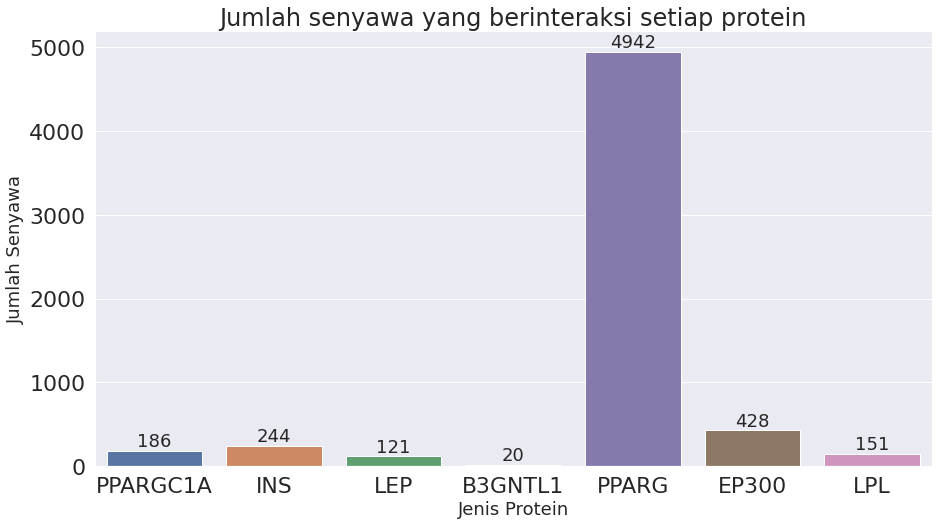

In [40]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df_vis.iloc[:,1:].sum().values)

plt.title("Jumlah senyawa yang berinteraksi setiap protein", fontsize=24)
plt.ylabel('Jumlah Senyawa', fontsize=18)
plt.xlabel('Jenis Protein', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df_vis.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [36]:
values = multiLabel_counts   
idx = categories
clrs = ['grey' if (x < max(values)) else 'pink' for x in values ]
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

In [33]:
multiLabel_counts

1    5410
2     127
3      59
4      30
5      14
6       9
7       1
dtype: int64

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


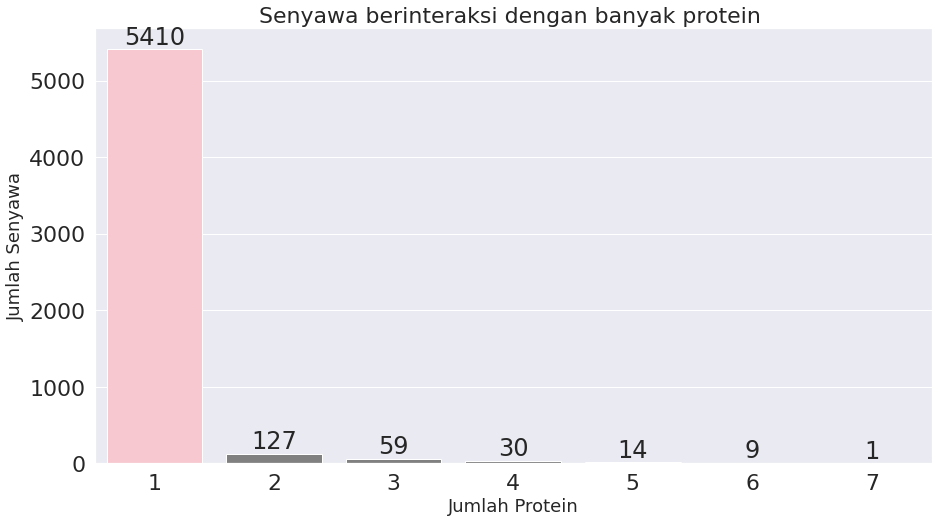

In [37]:
rowSums = df_vis.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, palette=clrs)

plt.title("Senyawa berinteraksi dengan banyak protein ", fontsize=22)
plt.ylabel('Jumlah Senyawa', fontsize=18)
plt.xlabel('Jumlah Protein', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# -----------------------------------------------------------------------

In [69]:
row_total = len(array_class.PPARG)
row_total

5650

In [ ]:
#get multilabel class

empty_x = []
empty_y = []

for i in range(row_total):
    
    for z in range(7):
        
        empty_x.append(array_class.iloc[i][z])
        
    print(empty_x)  
    empty_y.append(empty_x)
    empty_x = []

print(empty_y)
    
list_class = empty_y

In [71]:
array_class.to_csv('dataset/final/multilabel_class.csv', index=False)

In [ ]:
for i in range(len(array_class)):
    print(i)

In [ ]:
multilabeldata = []
for i in range(len(list_cid_unik)):
    multilabeldata.append((list_cid_unik[i],list_class[i]))
multilabeldata = pd.DataFrame(multilabeldata)
multilabeldata

In [ ]:
#rename 

multilabeldata = multilabeldata.rename(columns={0: 'CID_senyawa'})
multilabeldata = multilabeldata.rename(columns={1: 'Class'})
multilabeldata

In [83]:
# Merge multilabel data + fingerprints
# pubchem fingerprint
pubchem_final = pd.merge(df_fp_pubchem, multilabeldata, on='CID_senyawa')
klekota_final = pd.merge(df_fp_klekota, multilabeldata, on='CID_senyawa')
maccs_final = pd.merge(df_fp_maccs, multilabeldata, on='CID_senyawa')


ERROR! Session/line number was not unique in database. History logging moved to new session 249


In [86]:
pubchem_final.to_csv('dataset/final/pubchem-gabungan.csv', index=False)
klekota_final.to_csv('dataset/final/klekota-gabungan.csv', index=False)
maccs_final.to_csv('dataset/final/maccs-gabungan.csv', index=False)